## Import

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import chain

# for reading and displaying images
# from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.architectures.resnet import *
from src.architectures.levakov_96 import *
from src.architectures.inception import *
from src.architectures.dinsdale import *

from src.run import *

from torch.optim import *
import torch.optim as optim
from torchsummary import summary
from tensorboardX import SummaryWriter

## Dataloader
for kFold, it will be run again on the run

In [2]:
from src.dataloader import *

train_dset = MyDataset(task_type='age')
test_dset = MyDataset(task_type='age', test=True)

train_loader = DataLoader(train_dset, batch_size=8)
test_loader = DataLoader(test_dset, batch_size=8)

## Load Model

In [3]:
def load_model(model, verbose=True):
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(f'Model {model.capitalize()} is selected.')

    if model == 'resnet':
        

        opt = Option()
        model = generate_model(model_depth=opt.model_depth,
                                    n_classes=opt.n_classes,
                                    n_input_channels=opt.n_input_channels,
                                    shortcut_type=opt.shortcut_type,
                                    conv1_t_size=opt.conv1_t_size,
                                    conv1_t_stride=opt.conv1_t_stride,
                                    no_max_pool=opt.no_max_pool,
                                    widen_factor=opt.resnet_widen_factor)

    elif model == 'levakov':
        model = Levakov(task_type='age')

    elif model == 'inception':
        model = Inception3()

    elif model == 'dinsdale':
        model = Dinsdale(1, 1, 2)

    else: return None

    model.to(device)
    if verbose:
        print(summary(model, input_size=(1, 96, 96, 96)))
    
    return model, device

model = 'dinsdale'
# model, device = load_model('dinsdale')

## Setups

Default Settings

In [4]:
task_type = 'age' # no longer used.
resize = True
scheduler = False
epochs = range(100)
folds = range(10)

Loss & Optimizer

In [6]:
from src.losses import RMSELoss

loss_fn = nn.MSELoss()
lamb = 0.0005
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

Metrics

In [7]:
rmse_fn = RMSELoss()
mae_fn = nn.L1Loss()

## Run

### kFold Run

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

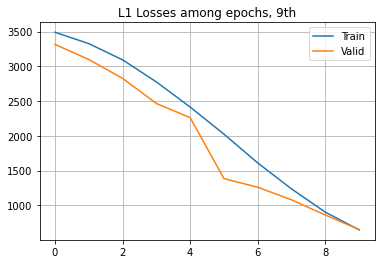

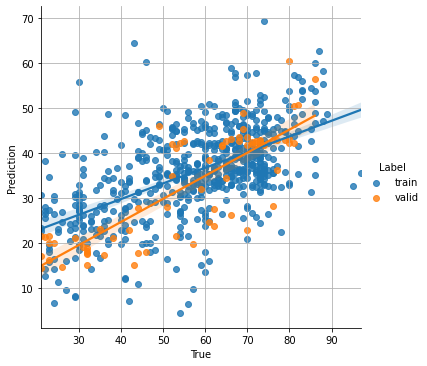

FOLD 0 - EPOCHS 10
MSE  :: [TRAIN] 455.122 | [VALID] 913.505
MAE  :: [TRAIN] 18.377   | [VALID] 26.385
RMSE :: [TRAIN] 20.813  | [VALID] 29.773
CORR :: [TRAIN] 0.602 | [VALID] 0.666
FOLD 0 - EPOCHS 15
MSE  :: [TRAIN] 143.978 | [VALID] 177.366
MAE  :: [TRAIN] 9.555   | [VALID] 10.617
RMSE :: [TRAIN] 11.358  | [VALID] 13.000
CORR :: [TRAIN] 0.713 | [VALID] 0.779


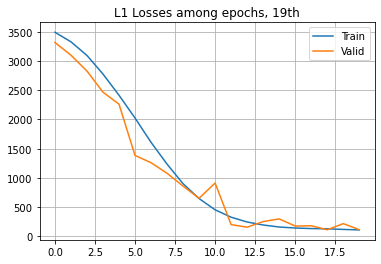

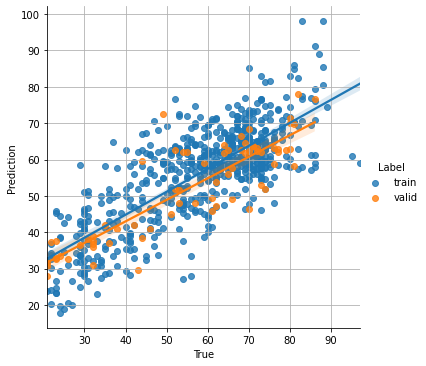

FOLD 0 - EPOCHS 20
MSE  :: [TRAIN] 111.281 | [VALID] 243.700
MAE  :: [TRAIN] 8.379   | [VALID] 12.803
RMSE :: [TRAIN] 10.115  | [VALID] 15.334
CORR :: [TRAIN] 0.770 | [VALID] 0.843
FOLD 0 - EPOCHS 25
MSE  :: [TRAIN] 95.571 | [VALID] 352.288
MAE  :: [TRAIN] 7.769   | [VALID] 15.496
RMSE :: [TRAIN] 9.332  | [VALID] 18.394
CORR :: [TRAIN] 0.803 | [VALID] 0.700


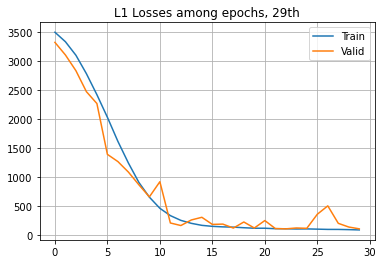

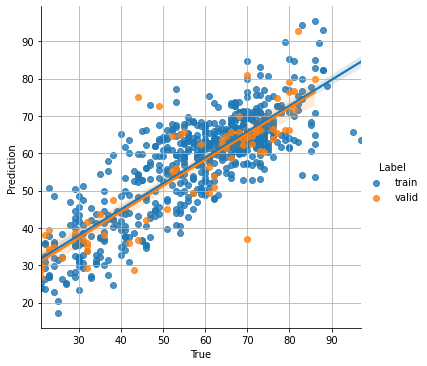

FOLD 0 - EPOCHS 30
MSE  :: [TRAIN] 80.015 | [VALID] 134.662
MAE  :: [TRAIN] 7.049   | [VALID] 9.158
RMSE :: [TRAIN] 8.504  | [VALID] 11.159
CORR :: [TRAIN] 0.837 | [VALID] 0.820
FOLD 0 - EPOCHS 35
MSE  :: [TRAIN] 66.905 | [VALID] 176.401
MAE  :: [TRAIN] 6.322   | [VALID] 10.224
RMSE :: [TRAIN] 7.736  | [VALID] 12.983
CORR :: [TRAIN] 0.865 | [VALID] 0.813


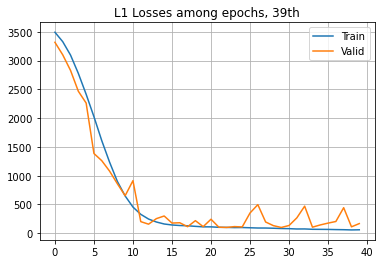

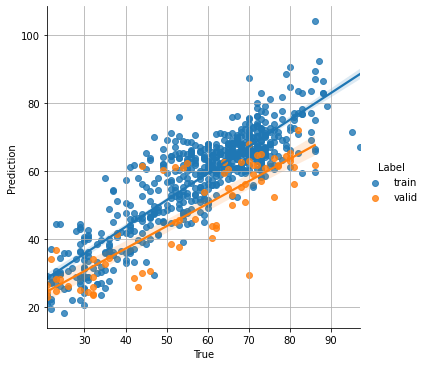

FOLD 0 - EPOCHS 40
MSE  :: [TRAIN] 58.684 | [VALID] 111.704
MAE  :: [TRAIN] 5.947   | [VALID] 8.178
RMSE :: [TRAIN] 7.272  | [VALID] 10.229
CORR :: [TRAIN] 0.883 | [VALID] 0.841
FOLD 0 - EPOCHS 45
MSE  :: [TRAIN] 50.537 | [VALID] 194.286
MAE  :: [TRAIN] 5.512   | [VALID] 11.682
RMSE :: [TRAIN] 6.721  | [VALID] 13.817
CORR :: [TRAIN] 0.900 | [VALID] 0.868


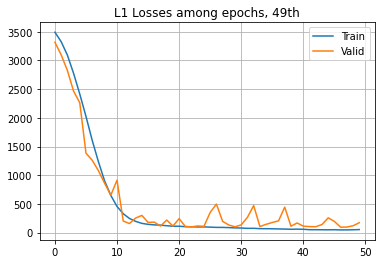

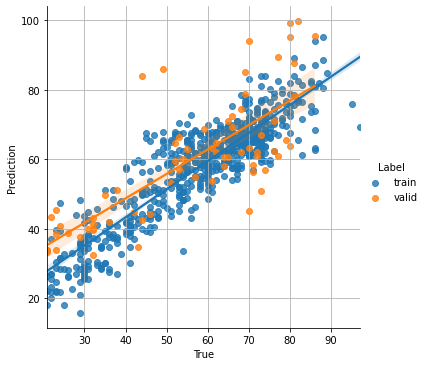

FOLD 0 - EPOCHS 50
MSE  :: [TRAIN] 48.164 | [VALID] 363.028
MAE  :: [TRAIN] 5.452   | [VALID] 16.337
RMSE :: [TRAIN] 6.619  | [VALID] 18.745
CORR :: [TRAIN] 0.905 | [VALID] 0.665
FOLD 0 - EPOCHS 55
MSE  :: [TRAIN] 34.954 | [VALID] 124.762
MAE  :: [TRAIN] 4.568   | [VALID] 8.664
RMSE :: [TRAIN] 5.593  | [VALID] 10.847
CORR :: [TRAIN] 0.932 | [VALID] 0.824


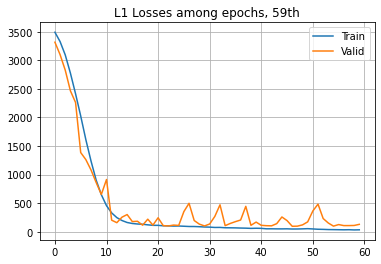

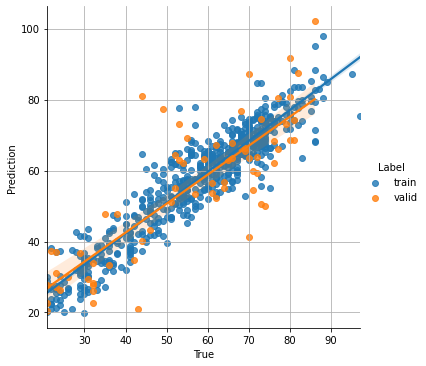

FOLD 0 - EPOCHS 60
MSE  :: [TRAIN] 36.970 | [VALID] 148.876
MAE  :: [TRAIN] 4.639   | [VALID] 9.511
RMSE :: [TRAIN] 5.768  | [VALID] 11.975
CORR :: [TRAIN] 0.928 | [VALID] 0.852
FOLD 0 - EPOCHS 65
MSE  :: [TRAIN] 24.998 | [VALID] 106.813
MAE  :: [TRAIN] 3.757   | [VALID] 7.566
RMSE :: [TRAIN] 4.589  | [VALID] 10.229
CORR :: [TRAIN] 0.952 | [VALID] 0.861


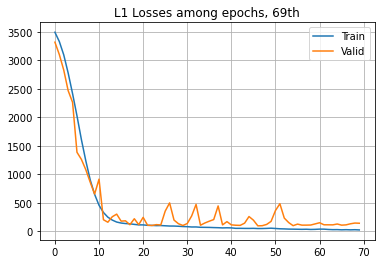

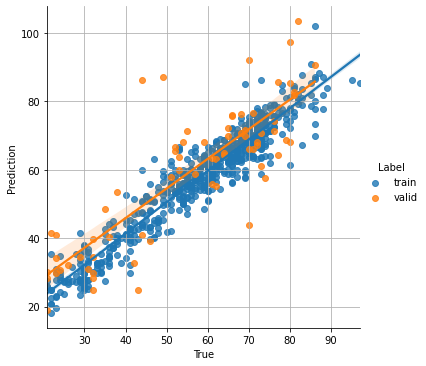

FOLD 0 - EPOCHS 70
MSE  :: [TRAIN] 22.386 | [VALID] 170.179
MAE  :: [TRAIN] 3.655   | [VALID] 9.793
RMSE :: [TRAIN] 4.446  | [VALID] 12.800
CORR :: [TRAIN] 0.957 | [VALID] 0.865
FOLD 0 - EPOCHS 75
MSE  :: [TRAIN] 21.780 | [VALID] 179.102
MAE  :: [TRAIN] 3.535   | [VALID] 10.668
RMSE :: [TRAIN] 4.389  | [VALID] 13.232
CORR :: [TRAIN] 0.958 | [VALID] 0.854


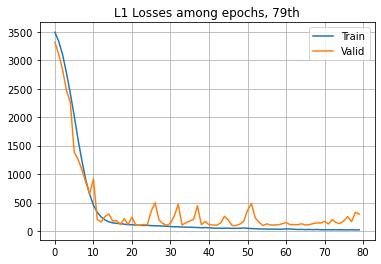

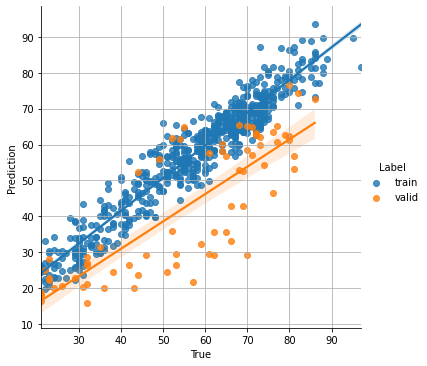

FOLD 0 - EPOCHS 80
MSE  :: [TRAIN] 21.131 | [VALID] 242.976
MAE  :: [TRAIN] 3.551   | [VALID] 12.994
RMSE :: [TRAIN] 4.333  | [VALID] 15.296
CORR :: [TRAIN] 0.960 | [VALID] 0.819
FOLD 0 - EPOCHS 85
MSE  :: [TRAIN] 19.593 | [VALID] 149.677
MAE  :: [TRAIN] 3.414   | [VALID] 9.954
RMSE :: [TRAIN] 4.105  | [VALID] 11.998
CORR :: [TRAIN] 0.963 | [VALID] 0.864


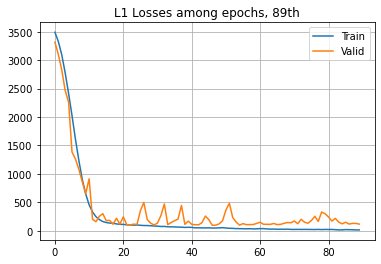

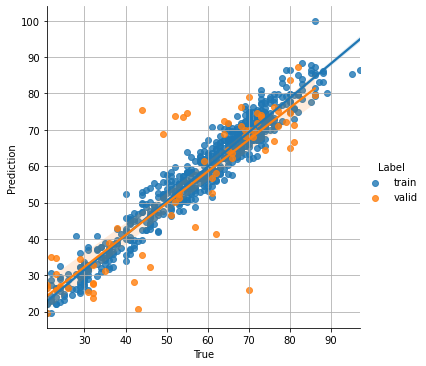

FOLD 0 - EPOCHS 90
MSE  :: [TRAIN] 12.786 | [VALID] 117.057
MAE  :: [TRAIN] 2.820   | [VALID] 7.964
RMSE :: [TRAIN] 3.361  | [VALID] 10.634
CORR :: [TRAIN] 0.976 | [VALID] 0.857
FOLD 0 - EPOCHS 95
MSE  :: [TRAIN] 9.822 | [VALID] 113.394
MAE  :: [TRAIN] 2.527   | [VALID] 7.630
RMSE :: [TRAIN] 3.021  | [VALID] 10.488
CORR :: [TRAIN] 0.981 | [VALID] 0.865


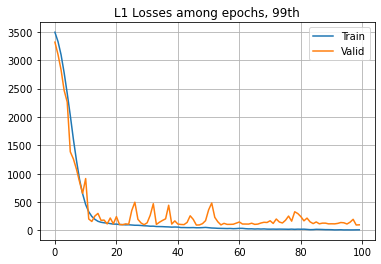

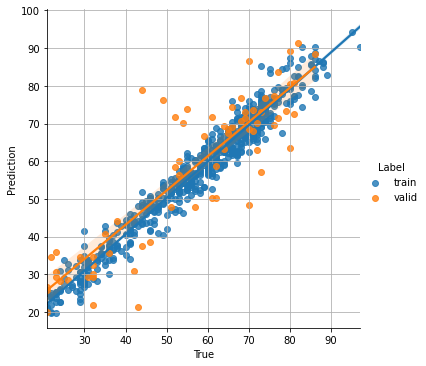

FOLD 0MSE  :: [TEST] 115.618
MAE  :: [TEST] 8.119
RMSE :: [TEST] 10.493
CORR :: [TEST] 0.803


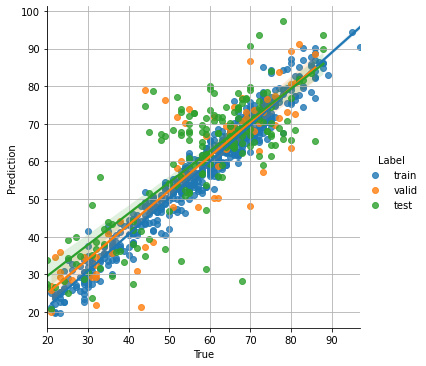

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

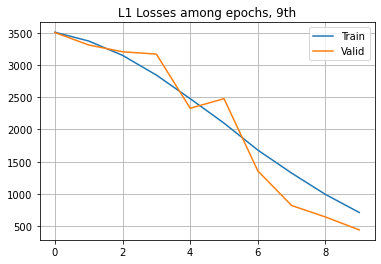

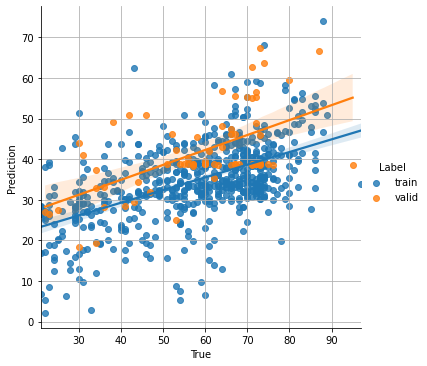

FOLD 1 - EPOCHS 10
MSE  :: [TRAIN] 493.354 | [VALID] 295.125
MAE  :: [TRAIN] 19.047   | [VALID] 14.217
RMSE :: [TRAIN] 21.660  | [VALID] 16.841
CORR :: [TRAIN] 0.604 | [VALID] 0.492
FOLD 1 - EPOCHS 15
MSE  :: [TRAIN] 174.360 | [VALID] 186.104
MAE  :: [TRAIN] 10.860   | [VALID] 11.236
RMSE :: [TRAIN] 12.623  | [VALID] 13.548
CORR :: [TRAIN] 0.678 | [VALID] 0.738


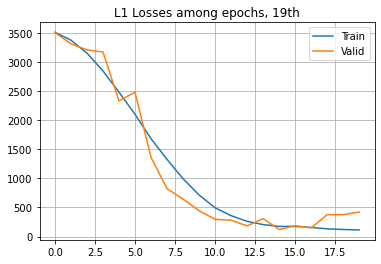

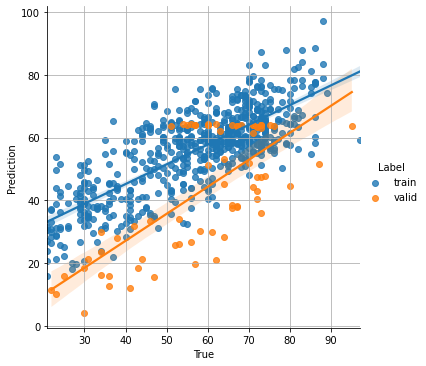

FOLD 1 - EPOCHS 20
MSE  :: [TRAIN] 102.618 | [VALID] 336.999
MAE  :: [TRAIN] 8.234   | [VALID] 15.403
RMSE :: [TRAIN] 9.711  | [VALID] 18.138
CORR :: [TRAIN] 0.800 | [VALID] 0.754
FOLD 1 - EPOCHS 25
MSE  :: [TRAIN] 86.736 | [VALID] 117.907
MAE  :: [TRAIN] 7.386   | [VALID] 8.773
RMSE :: [TRAIN] 8.850  | [VALID] 10.456
CORR :: [TRAIN] 0.832 | [VALID] 0.791


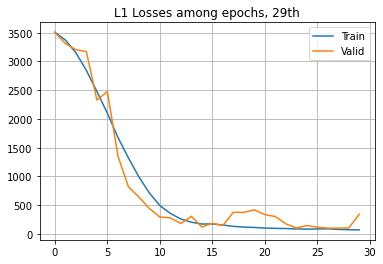

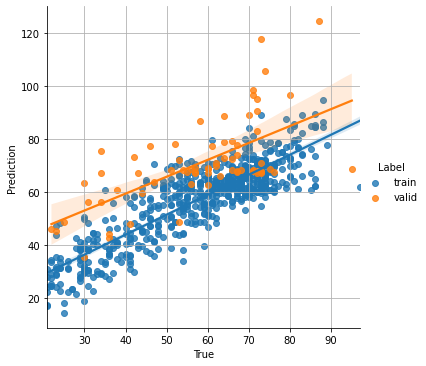

FOLD 1 - EPOCHS 30
MSE  :: [TRAIN] 65.646 | [VALID] 404.809
MAE  :: [TRAIN] 6.327   | [VALID] 16.418
RMSE :: [TRAIN] 7.684  | [VALID] 19.559
CORR :: [TRAIN] 0.876 | [VALID] 0.626
FOLD 1 - EPOCHS 35
MSE  :: [TRAIN] 58.494 | [VALID] 89.820
MAE  :: [TRAIN] 5.906   | [VALID] 7.499
RMSE :: [TRAIN] 7.258  | [VALID] 9.276
CORR :: [TRAIN] 0.890 | [VALID] 0.812


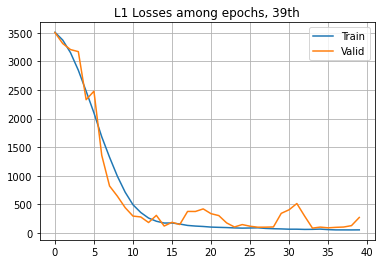

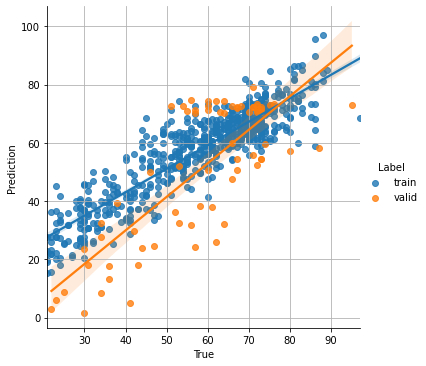

FOLD 1 - EPOCHS 40
MSE  :: [TRAIN] 53.814 | [VALID] 212.019
MAE  :: [TRAIN] 5.623   | [VALID] 11.611
RMSE :: [TRAIN] 6.964  | [VALID] 13.902
CORR :: [TRAIN] 0.899 | [VALID] 0.798
FOLD 1 - EPOCHS 45
MSE  :: [TRAIN] 41.990 | [VALID] 157.690
MAE  :: [TRAIN] 4.954   | [VALID] 9.974
RMSE :: [TRAIN] 6.098  | [VALID] 12.082
CORR :: [TRAIN] 0.922 | [VALID] 0.813


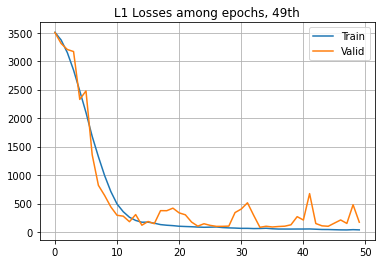

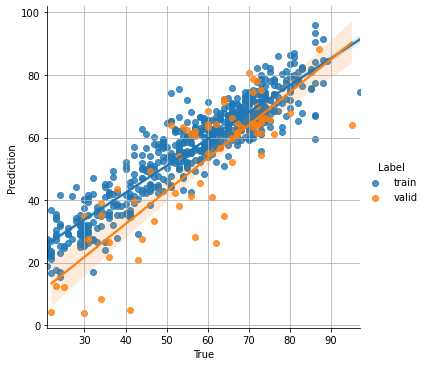

FOLD 1 - EPOCHS 50
MSE  :: [TRAIN] 56.075 | [VALID] 167.517
MAE  :: [TRAIN] 5.829   | [VALID] 10.158
RMSE :: [TRAIN] 7.122  | [VALID] 12.378
CORR :: [TRAIN] 0.895 | [VALID] 0.791
FOLD 1 - EPOCHS 55
MSE  :: [TRAIN] 28.775 | [VALID] 132.978
MAE  :: [TRAIN] 4.051   | [VALID] 9.219
RMSE :: [TRAIN] 5.001  | [VALID] 11.203
CORR :: [TRAIN] 0.948 | [VALID] 0.792


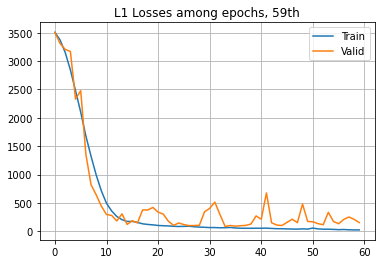

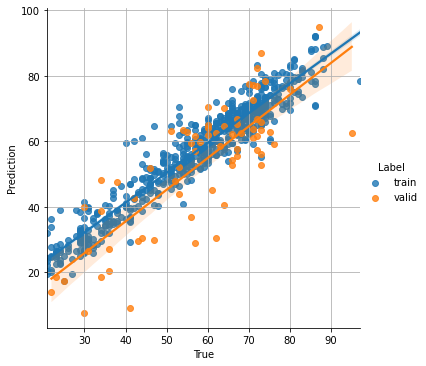

FOLD 1 - EPOCHS 60
MSE  :: [TRAIN] 26.962 | [VALID] 131.847
MAE  :: [TRAIN] 3.857   | [VALID] 9.148
RMSE :: [TRAIN] 4.777  | [VALID] 11.094
CORR :: [TRAIN] 0.951 | [VALID] 0.812
FOLD 1 - EPOCHS 65
MSE  :: [TRAIN] 18.461 | [VALID] 159.038
MAE  :: [TRAIN] 3.313   | [VALID] 10.188
RMSE :: [TRAIN] 4.022  | [VALID] 12.386
CORR :: [TRAIN] 0.967 | [VALID] 0.742


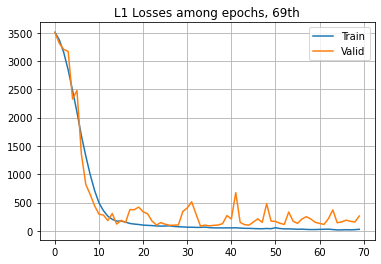

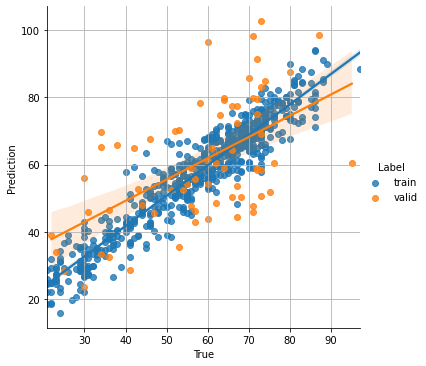

FOLD 1 - EPOCHS 70
MSE  :: [TRAIN] 24.833 | [VALID] 133.208
MAE  :: [TRAIN] 3.996   | [VALID] 9.125
RMSE :: [TRAIN] 4.755  | [VALID] 11.316
CORR :: [TRAIN] 0.955 | [VALID] 0.716
FOLD 1 - EPOCHS 75
MSE  :: [TRAIN] 24.303 | [VALID] 262.903
MAE  :: [TRAIN] 3.891   | [VALID] 13.127
RMSE :: [TRAIN] 4.674  | [VALID] 15.907
CORR :: [TRAIN] 0.956 | [VALID] 0.442


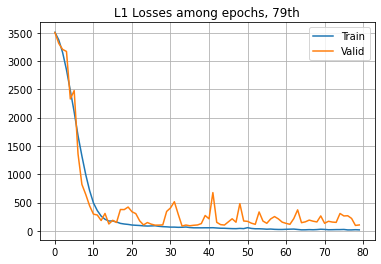

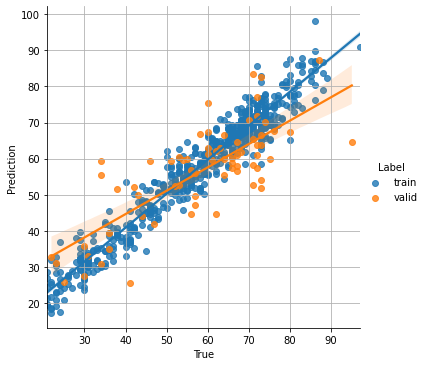

FOLD 1 - EPOCHS 80
MSE  :: [TRAIN] 15.954 | [VALID] 89.177
MAE  :: [TRAIN] 3.142   | [VALID] 7.068
RMSE :: [TRAIN] 3.761  | [VALID] 9.220
CORR :: [TRAIN] 0.971 | [VALID] 0.814
FOLD 1 - EPOCHS 85
MSE  :: [TRAIN] 15.387 | [VALID] 154.228
MAE  :: [TRAIN] 3.059   | [VALID] 9.499
RMSE :: [TRAIN] 3.745  | [VALID] 12.182
CORR :: [TRAIN] 0.972 | [VALID] 0.738


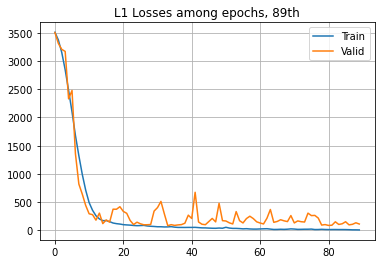

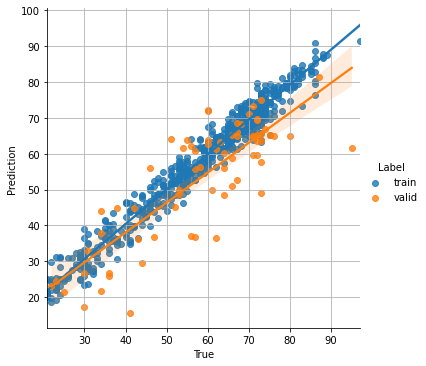

FOLD 1 - EPOCHS 90
MSE  :: [TRAIN] 10.325 | [VALID] 122.715
MAE  :: [TRAIN] 2.546   | [VALID] 8.579
RMSE :: [TRAIN] 3.021  | [VALID] 10.847
CORR :: [TRAIN] 0.982 | [VALID] 0.816
FOLD 1 - EPOCHS 95
MSE  :: [TRAIN] 13.079 | [VALID] 123.002
MAE  :: [TRAIN] 2.858   | [VALID] 8.885
RMSE :: [TRAIN] 3.422  | [VALID] 10.764
CORR :: [TRAIN] 0.977 | [VALID] 0.741


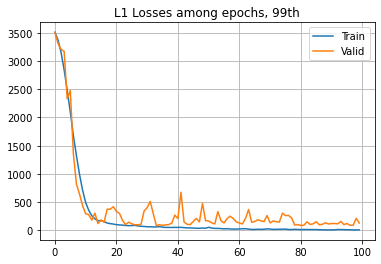

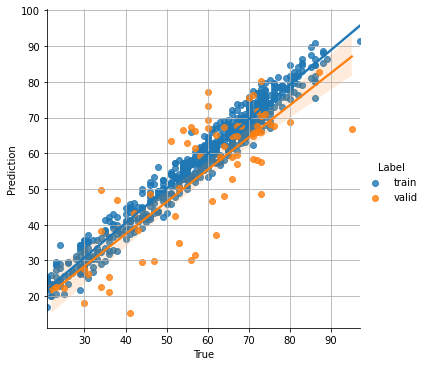

FOLD 1MSE  :: [TEST] 143.580
MAE  :: [TEST] 9.666
RMSE :: [TEST] 11.735
CORR :: [TEST] 0.777


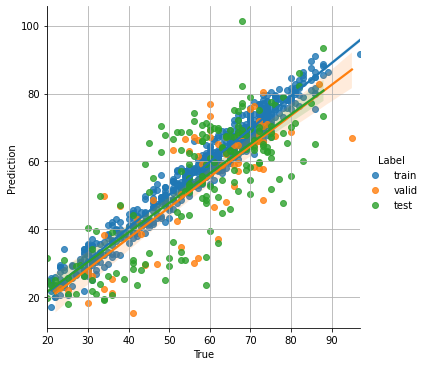

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

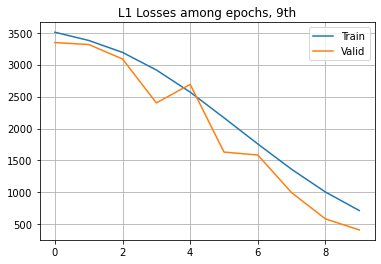

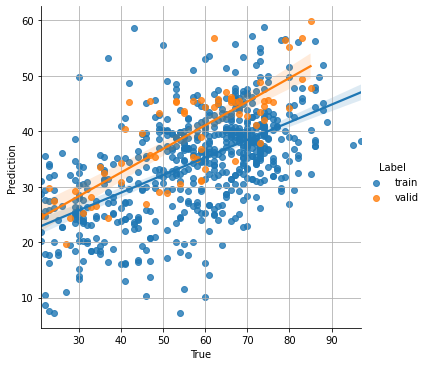

FOLD 2 - EPOCHS 10
MSE  :: [TRAIN] 494.454 | [VALID] 300.747
MAE  :: [TRAIN] 19.209   | [VALID] 14.543
RMSE :: [TRAIN] 21.683  | [VALID] 16.993
CORR :: [TRAIN] 0.620 | [VALID] 0.746
FOLD 2 - EPOCHS 15
MSE  :: [TRAIN] 150.993 | [VALID] 1706.641
MAE  :: [TRAIN] 9.909   | [VALID] 34.685
RMSE :: [TRAIN] 11.740  | [VALID] 41.000
CORR :: [TRAIN] 0.710 | [VALID] 0.354


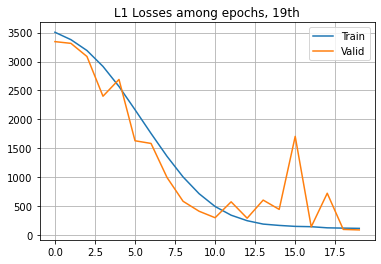

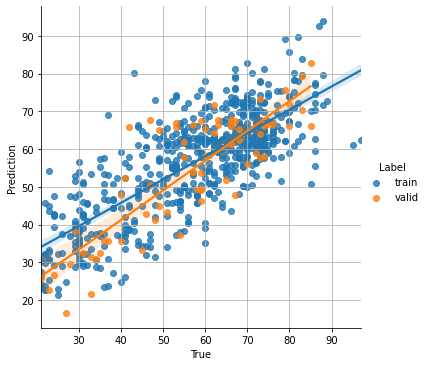

FOLD 2 - EPOCHS 20
MSE  :: [TRAIN] 114.705 | [VALID] 281.405
MAE  :: [TRAIN] 8.651   | [VALID] 13.322
RMSE :: [TRAIN] 10.192  | [VALID] 16.069
CORR :: [TRAIN] 0.769 | [VALID] 0.645
FOLD 2 - EPOCHS 25
MSE  :: [TRAIN] 94.691 | [VALID] 98.483
MAE  :: [TRAIN] 7.730   | [VALID] 8.070
RMSE :: [TRAIN] 9.272  | [VALID] 9.708
CORR :: [TRAIN] 0.813 | [VALID] 0.810


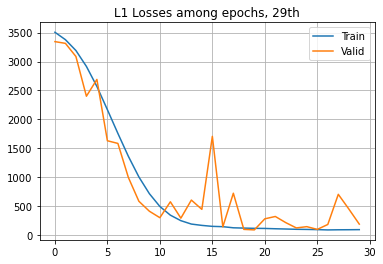

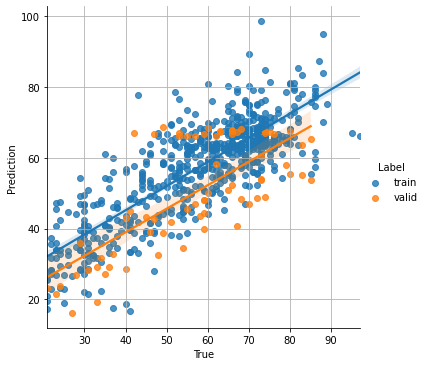

FOLD 2 - EPOCHS 30
MSE  :: [TRAIN] 88.400 | [VALID] 126.248
MAE  :: [TRAIN] 7.466   | [VALID] 9.260
RMSE :: [TRAIN] 8.921  | [VALID] 11.169
CORR :: [TRAIN] 0.826 | [VALID] 0.755
FOLD 2 - EPOCHS 35
MSE  :: [TRAIN] 69.328 | [VALID] 473.074
MAE  :: [TRAIN] 6.492   | [VALID] 18.557
RMSE :: [TRAIN] 7.812  | [VALID] 21.448
CORR :: [TRAIN] 0.867 | [VALID] 0.655


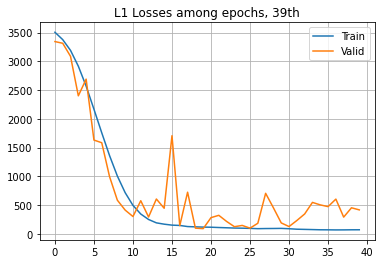

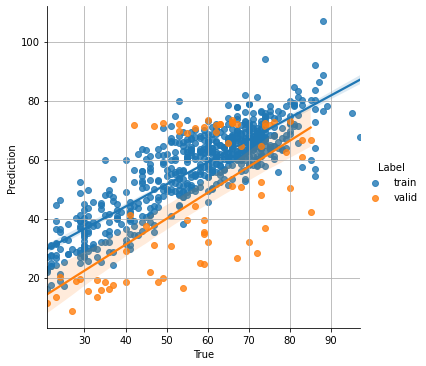

FOLD 2 - EPOCHS 40
MSE  :: [TRAIN] 69.631 | [VALID] 1106.279
MAE  :: [TRAIN] 6.556   | [VALID] 28.245
RMSE :: [TRAIN] 7.921  | [VALID] 32.866
CORR :: [TRAIN] 0.866 | [VALID] 0.458
FOLD 2 - EPOCHS 45
MSE  :: [TRAIN] 68.396 | [VALID] 486.813
MAE  :: [TRAIN] 6.546   | [VALID] 18.678
RMSE :: [TRAIN] 7.850  | [VALID] 21.692
CORR :: [TRAIN] 0.868 | [VALID] 0.693


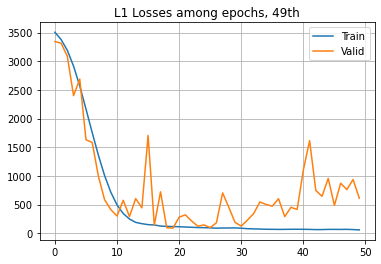

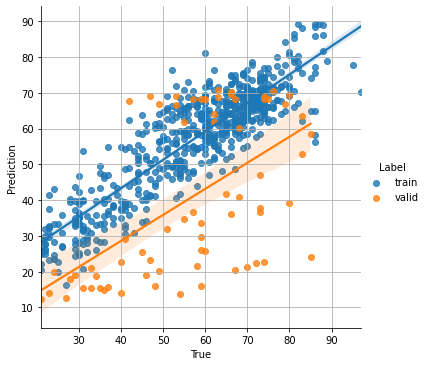

FOLD 2 - EPOCHS 50
MSE  :: [TRAIN] 52.756 | [VALID] 406.911
MAE  :: [TRAIN] 5.706   | [VALID] 16.499
RMSE :: [TRAIN] 6.927  | [VALID] 19.743
CORR :: [TRAIN] 0.900 | [VALID] 0.679
FOLD 2 - EPOCHS 55
MSE  :: [TRAIN] 47.079 | [VALID] 961.049
MAE  :: [TRAIN] 5.319   | [VALID] 26.439
RMSE :: [TRAIN] 6.457  | [VALID] 30.743
CORR :: [TRAIN] 0.911 | [VALID] 0.455


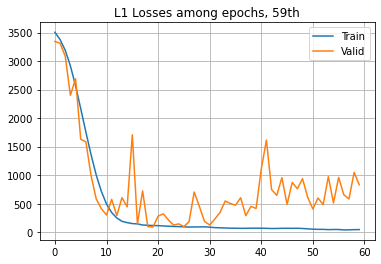

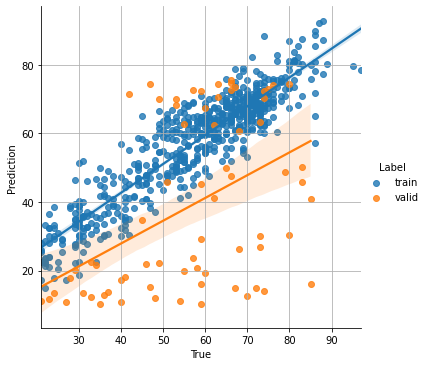

FOLD 2 - EPOCHS 60
MSE  :: [TRAIN] 42.563 | [VALID] 612.168
MAE  :: [TRAIN] 5.056   | [VALID] 21.554
RMSE :: [TRAIN] 6.151  | [VALID] 24.441
CORR :: [TRAIN] 0.920 | [VALID] 0.582
FOLD 2 - EPOCHS 65
MSE  :: [TRAIN] 28.187 | [VALID] 227.225
MAE  :: [TRAIN] 4.143   | [VALID] 12.594
RMSE :: [TRAIN] 4.995  | [VALID] 14.665
CORR :: [TRAIN] 0.948 | [VALID] 0.775


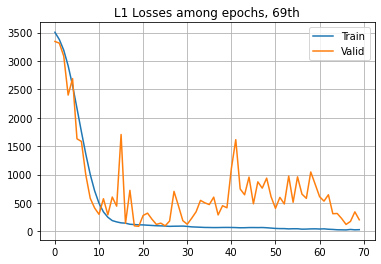

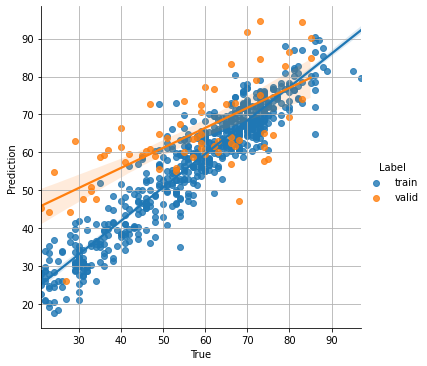

FOLD 2 - EPOCHS 70
MSE  :: [TRAIN] 32.158 | [VALID] 229.787
MAE  :: [TRAIN] 4.365   | [VALID] 12.704
RMSE :: [TRAIN] 5.335  | [VALID] 14.830
CORR :: [TRAIN] 0.940 | [VALID] 0.786
FOLD 2 - EPOCHS 75
MSE  :: [TRAIN] 19.590 | [VALID] 177.275
MAE  :: [TRAIN] 3.488   | [VALID] 10.346
RMSE :: [TRAIN] 4.239  | [VALID] 12.426
CORR :: [TRAIN] 0.964 | [VALID] 0.647


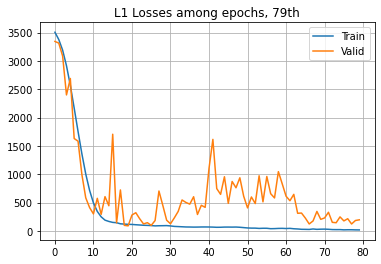

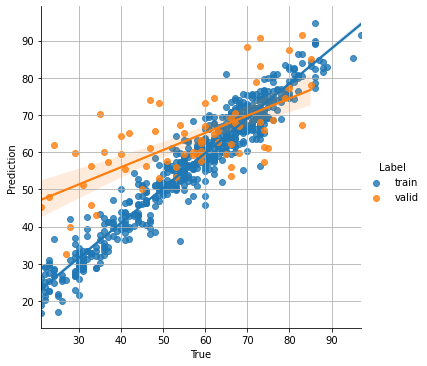

FOLD 2 - EPOCHS 80
MSE  :: [TRAIN] 21.273 | [VALID] 110.418
MAE  :: [TRAIN] 3.640   | [VALID] 8.392
RMSE :: [TRAIN] 4.408  | [VALID] 10.381
CORR :: [TRAIN] 0.961 | [VALID] 0.792
FOLD 2 - EPOCHS 85
MSE  :: [TRAIN] 15.953 | [VALID] 273.445
MAE  :: [TRAIN] 3.156   | [VALID] 13.356
RMSE :: [TRAIN] 3.805  | [VALID] 15.702
CORR :: [TRAIN] 0.971 | [VALID] 0.656


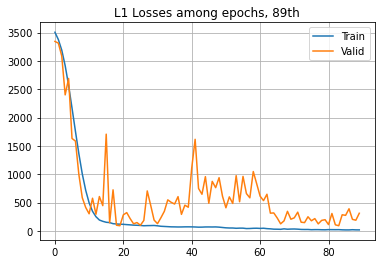

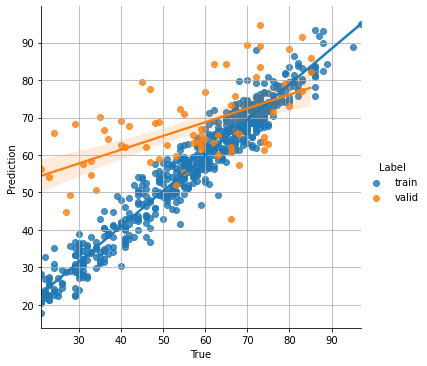

FOLD 2 - EPOCHS 90
MSE  :: [TRAIN] 18.125 | [VALID] 275.773
MAE  :: [TRAIN] 3.341   | [VALID] 13.336
RMSE :: [TRAIN] 4.075  | [VALID] 15.771
CORR :: [TRAIN] 0.967 | [VALID] 0.566
FOLD 2 - EPOCHS 95
MSE  :: [TRAIN] 14.693 | [VALID] 313.341
MAE  :: [TRAIN] 3.054   | [VALID] 14.674
RMSE :: [TRAIN] 3.642  | [VALID] 17.032
CORR :: [TRAIN] 0.973 | [VALID] 0.669


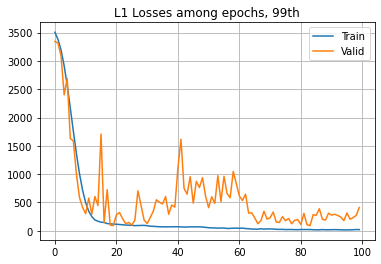

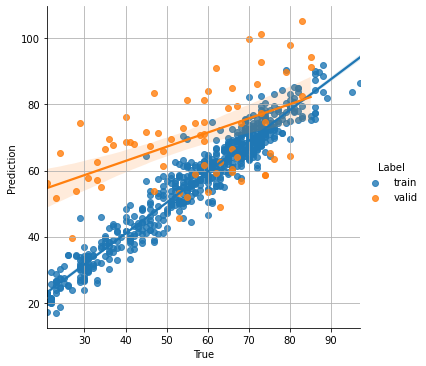

FOLD 2MSE  :: [TEST] 398.576
MAE  :: [TEST] 16.935
RMSE :: [TEST] 19.312
CORR :: [TEST] 0.378


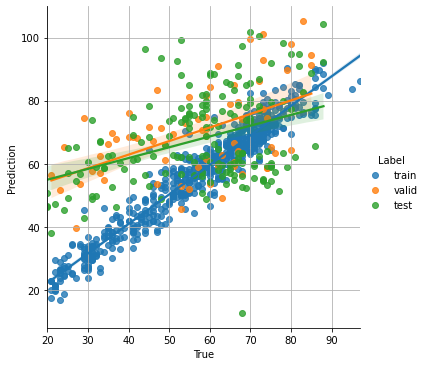

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

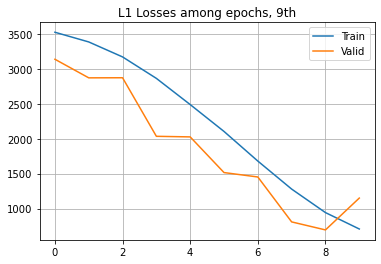

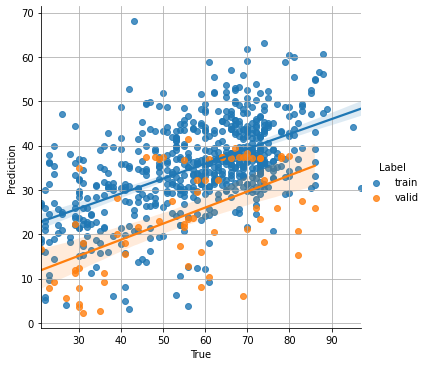

FOLD 3 - EPOCHS 10
MSE  :: [TRAIN] 486.596 | [VALID] 311.783
MAE  :: [TRAIN] 19.056   | [VALID] 14.910
RMSE :: [TRAIN] 21.540  | [VALID] 17.527
CORR :: [TRAIN] 0.582 | [VALID] 0.817
FOLD 3 - EPOCHS 15
MSE  :: [TRAIN] 161.130 | [VALID] 99.847
MAE  :: [TRAIN] 10.341   | [VALID] 8.334
RMSE :: [TRAIN] 12.169  | [VALID] 9.865
CORR :: [TRAIN] 0.686 | [VALID] 0.848


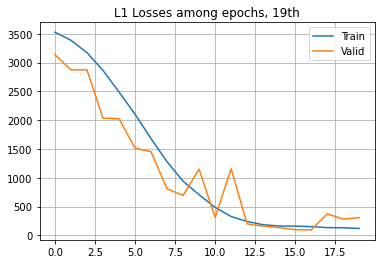

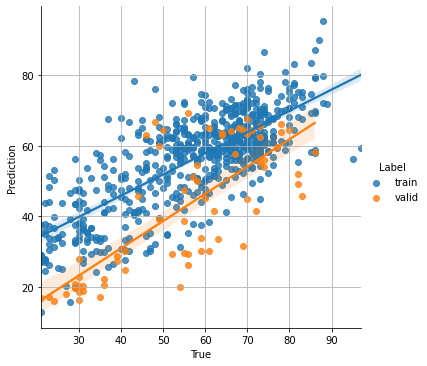

FOLD 3 - EPOCHS 20
MSE  :: [TRAIN] 110.625 | [VALID] 201.939
MAE  :: [TRAIN] 8.510   | [VALID] 11.569
RMSE :: [TRAIN] 10.030  | [VALID] 13.810
CORR :: [TRAIN] 0.775 | [VALID] 0.812
FOLD 3 - EPOCHS 25
MSE  :: [TRAIN] 86.262 | [VALID] 101.177
MAE  :: [TRAIN] 7.399   | [VALID] 7.587
RMSE :: [TRAIN] 8.849  | [VALID] 9.975
CORR :: [TRAIN] 0.829 | [VALID] 0.861


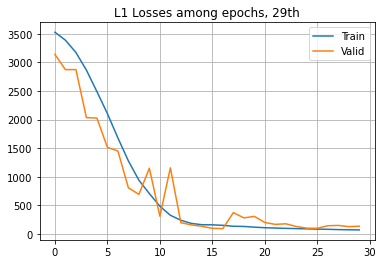

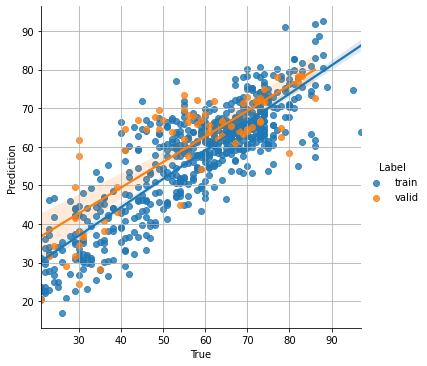

FOLD 3 - EPOCHS 30
MSE  :: [TRAIN] 70.994 | [VALID] 125.503
MAE  :: [TRAIN] 6.532   | [VALID] 8.668
RMSE :: [TRAIN] 7.975  | [VALID] 10.771
CORR :: [TRAIN] 0.861 | [VALID] 0.808
FOLD 3 - EPOCHS 35
MSE  :: [TRAIN] 68.502 | [VALID] 236.212
MAE  :: [TRAIN] 6.400   | [VALID] 12.490
RMSE :: [TRAIN] 7.853  | [VALID] 15.113
CORR :: [TRAIN] 0.866 | [VALID] 0.818


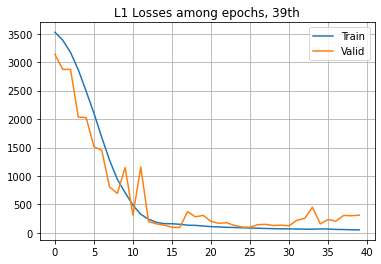

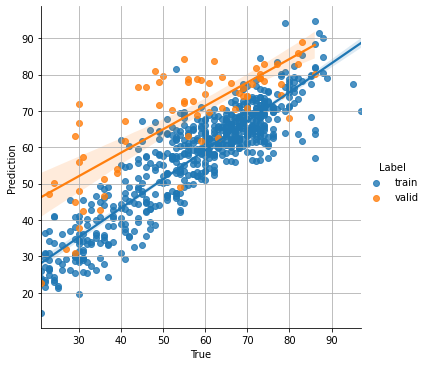

FOLD 3 - EPOCHS 40
MSE  :: [TRAIN] 54.454 | [VALID] 158.673
MAE  :: [TRAIN] 5.800   | [VALID] 9.199
RMSE :: [TRAIN] 7.085  | [VALID] 12.085
CORR :: [TRAIN] 0.895 | [VALID] 0.796
FOLD 3 - EPOCHS 45
MSE  :: [TRAIN] 49.059 | [VALID] 952.617
MAE  :: [TRAIN] 5.370   | [VALID] 24.838
RMSE :: [TRAIN] 6.625  | [VALID] 30.112
CORR :: [TRAIN] 0.906 | [VALID] 0.416


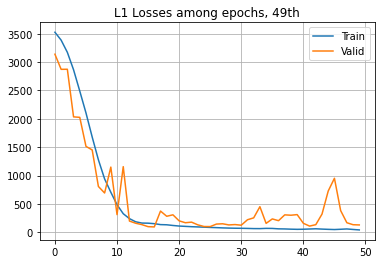

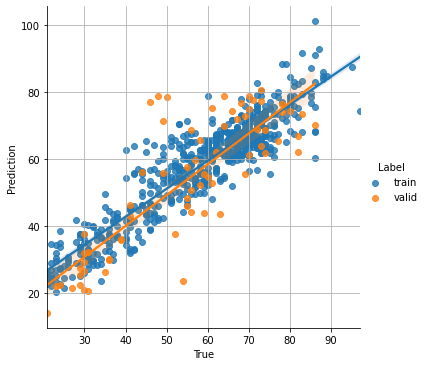

FOLD 3 - EPOCHS 50
MSE  :: [TRAIN] 37.169 | [VALID] 117.224
MAE  :: [TRAIN] 4.693   | [VALID] 8.497
RMSE :: [TRAIN] 5.790  | [VALID] 10.384
CORR :: [TRAIN] 0.930 | [VALID] 0.834
FOLD 3 - EPOCHS 55
MSE  :: [TRAIN] 41.112 | [VALID] 538.824
MAE  :: [TRAIN] 4.898   | [VALID] 18.855
RMSE :: [TRAIN] 6.102  | [VALID] 22.580
CORR :: [TRAIN] 0.922 | [VALID] 0.559


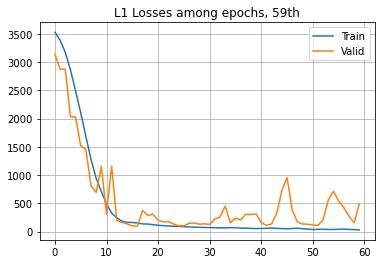

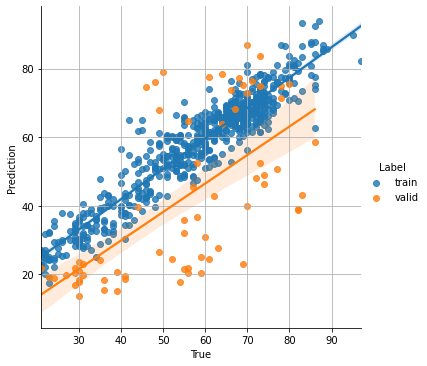

FOLD 3 - EPOCHS 60
MSE  :: [TRAIN] 29.386 | [VALID] 463.606
MAE  :: [TRAIN] 4.173   | [VALID] 17.733
RMSE :: [TRAIN] 5.105  | [VALID] 20.887
CORR :: [TRAIN] 0.945 | [VALID] 0.672
FOLD 3 - EPOCHS 65
MSE  :: [TRAIN] 34.650 | [VALID] 85.570
MAE  :: [TRAIN] 4.594   | [VALID] 7.643
RMSE :: [TRAIN] 5.599  | [VALID] 9.058
CORR :: [TRAIN] 0.935 | [VALID] 0.883


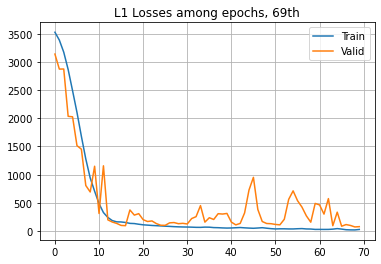

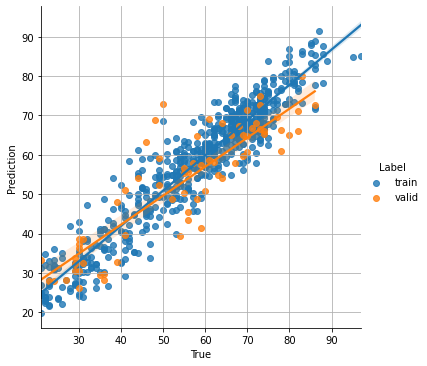

FOLD 3 - EPOCHS 70
MSE  :: [TRAIN] 23.964 | [VALID] 91.925
MAE  :: [TRAIN] 3.896   | [VALID] 8.048
RMSE :: [TRAIN] 4.627  | [VALID] 9.418
CORR :: [TRAIN] 0.955 | [VALID] 0.850
FOLD 3 - EPOCHS 75
MSE  :: [TRAIN] 22.243 | [VALID] 100.759
MAE  :: [TRAIN] 3.737   | [VALID] 7.623
RMSE :: [TRAIN] 4.472  | [VALID] 9.802
CORR :: [TRAIN] 0.959 | [VALID] 0.856


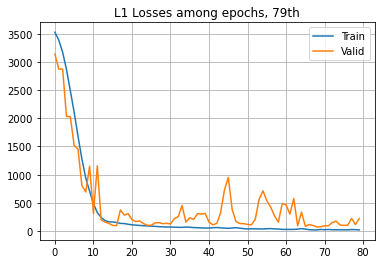

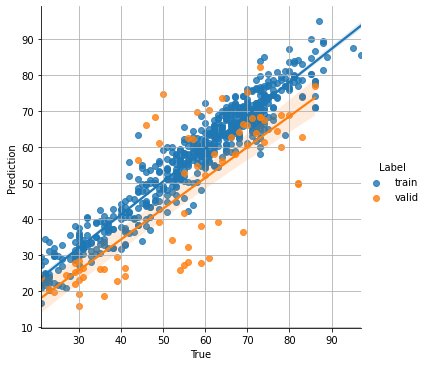

FOLD 3 - EPOCHS 80
MSE  :: [TRAIN] 21.428 | [VALID] 116.968
MAE  :: [TRAIN] 3.531   | [VALID] 7.969
RMSE :: [TRAIN] 4.389  | [VALID] 10.522
CORR :: [TRAIN] 0.960 | [VALID] 0.861
FOLD 3 - EPOCHS 85
MSE  :: [TRAIN] 24.205 | [VALID] 236.513
MAE  :: [TRAIN] 3.863   | [VALID] 12.349
RMSE :: [TRAIN] 4.683  | [VALID] 14.995
CORR :: [TRAIN] 0.955 | [VALID] 0.735


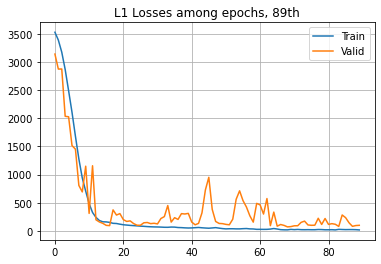

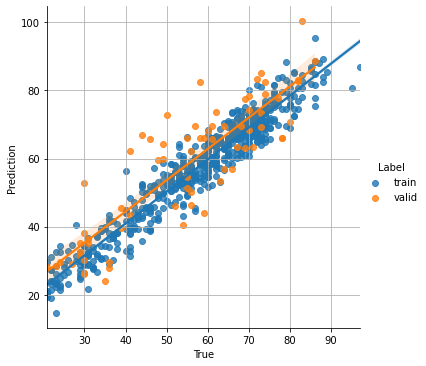

FOLD 3 - EPOCHS 90
MSE  :: [TRAIN] 20.583 | [VALID] 107.601
MAE  :: [TRAIN] 3.563   | [VALID] 8.438
RMSE :: [TRAIN] 4.364  | [VALID] 10.125
CORR :: [TRAIN] 0.962 | [VALID] 0.848
FOLD 3 - EPOCHS 95
MSE  :: [TRAIN] 8.945 | [VALID] 98.835
MAE  :: [TRAIN] 2.338   | [VALID] 7.710
RMSE :: [TRAIN] 2.810  | [VALID] 9.586
CORR :: [TRAIN] 0.984 | [VALID] 0.872


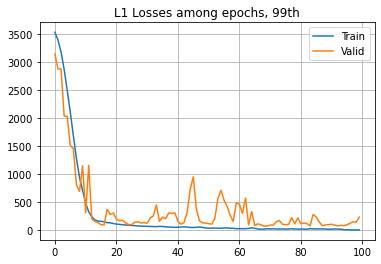

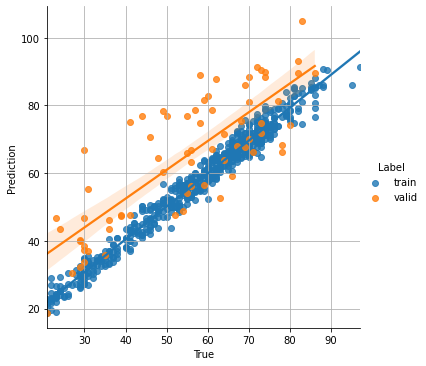

FOLD 3MSE  :: [TEST] 217.385
MAE  :: [TEST] 11.555
RMSE :: [TEST] 14.235
CORR :: [TEST] 0.714


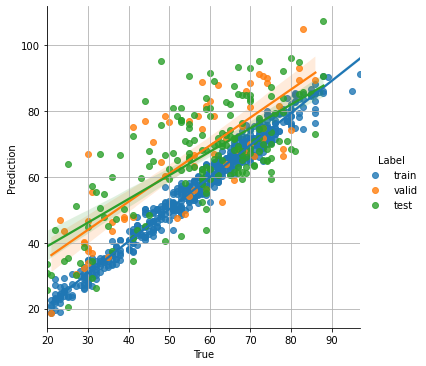

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

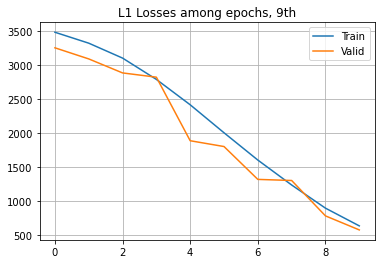

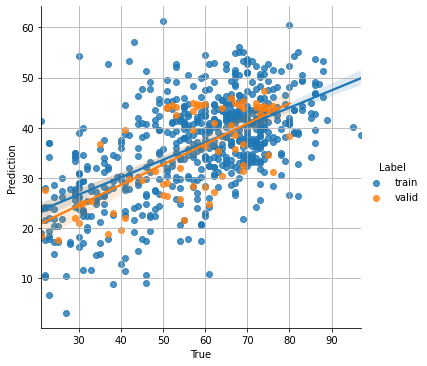

FOLD 4 - EPOCHS 10
MSE  :: [TRAIN] 451.726 | [VALID] 362.742
MAE  :: [TRAIN] 18.156   | [VALID] 16.225
RMSE :: [TRAIN] 20.571  | [VALID] 18.787
CORR :: [TRAIN] 0.610 | [VALID] 0.729
FOLD 4 - EPOCHS 15
MSE  :: [TRAIN] 160.390 | [VALID] 121.135
MAE  :: [TRAIN] 10.320   | [VALID] 9.251
RMSE :: [TRAIN] 12.111  | [VALID] 10.824
CORR :: [TRAIN] 0.689 | [VALID] 0.789


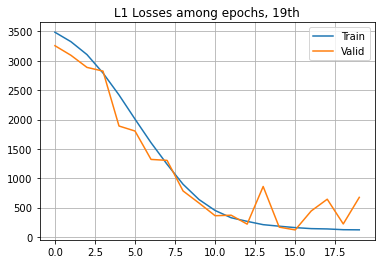

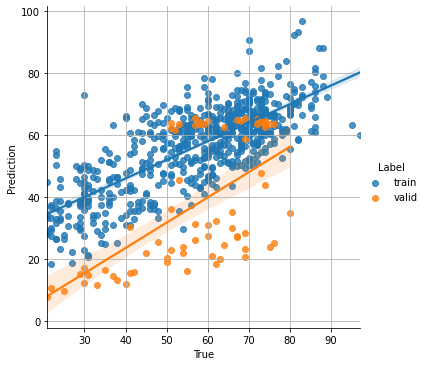

FOLD 4 - EPOCHS 20
MSE  :: [TRAIN] 115.788 | [VALID] 644.688
MAE  :: [TRAIN] 8.677   | [VALID] 21.101
RMSE :: [TRAIN] 10.301  | [VALID] 24.999
CORR :: [TRAIN] 0.773 | [VALID] 0.566
FOLD 4 - EPOCHS 25
MSE  :: [TRAIN] 94.031 | [VALID] 210.567
MAE  :: [TRAIN] 7.899   | [VALID] 11.573
RMSE :: [TRAIN] 9.273  | [VALID] 14.155
CORR :: [TRAIN] 0.819 | [VALID] 0.692


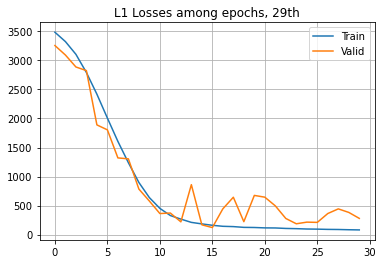

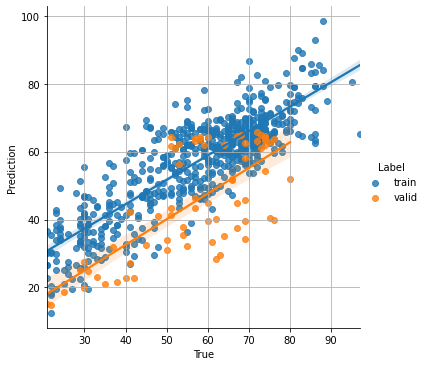

FOLD 4 - EPOCHS 30
MSE  :: [TRAIN] 75.986 | [VALID] 94.894
MAE  :: [TRAIN] 6.976   | [VALID] 8.163
RMSE :: [TRAIN] 8.271  | [VALID] 9.549
CORR :: [TRAIN] 0.857 | [VALID] 0.819
FOLD 4 - EPOCHS 35
MSE  :: [TRAIN] 67.008 | [VALID] 154.647
MAE  :: [TRAIN] 6.553   | [VALID] 10.345
RMSE :: [TRAIN] 7.808  | [VALID] 12.238
CORR :: [TRAIN] 0.875 | [VALID] 0.724


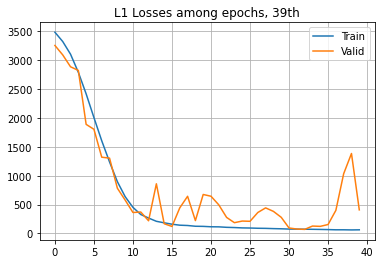

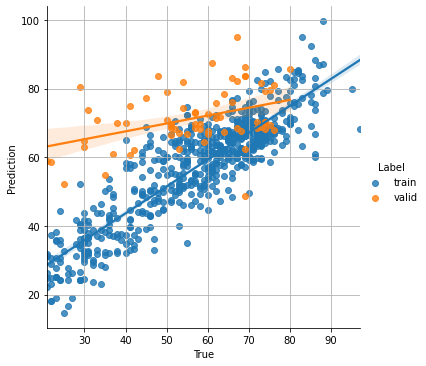

FOLD 4 - EPOCHS 40
MSE  :: [TRAIN] 61.521 | [VALID] 450.436
MAE  :: [TRAIN] 6.113   | [VALID] 17.934
RMSE :: [TRAIN] 7.413  | [VALID] 21.128
CORR :: [TRAIN] 0.886 | [VALID] 0.266
FOLD 4 - EPOCHS 45
MSE  :: [TRAIN] 50.270 | [VALID] 151.254
MAE  :: [TRAIN] 5.462   | [VALID] 10.509
RMSE :: [TRAIN] 6.731  | [VALID] 12.079
CORR :: [TRAIN] 0.908 | [VALID] 0.843


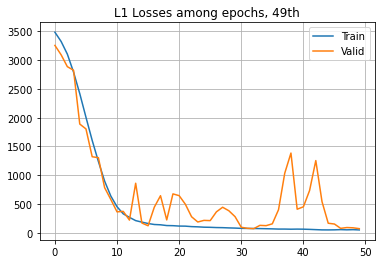

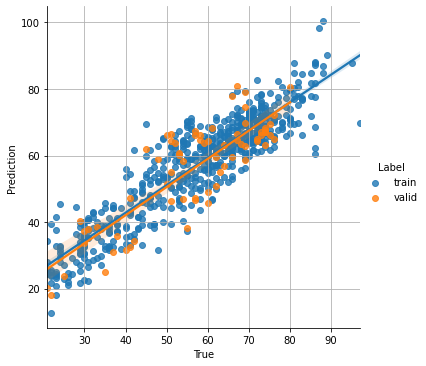

FOLD 4 - EPOCHS 50
MSE  :: [TRAIN] 47.385 | [VALID] 80.664
MAE  :: [TRAIN] 5.378   | [VALID] 7.777
RMSE :: [TRAIN] 6.546  | [VALID] 8.890
CORR :: [TRAIN] 0.913 | [VALID] 0.812
FOLD 4 - EPOCHS 55
MSE  :: [TRAIN] 48.457 | [VALID] 280.246
MAE  :: [TRAIN] 5.412   | [VALID] 14.291
RMSE :: [TRAIN] 6.589  | [VALID] 16.245
CORR :: [TRAIN] 0.911 | [VALID] 0.774


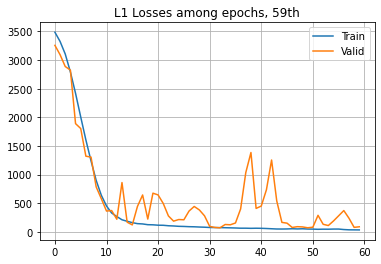

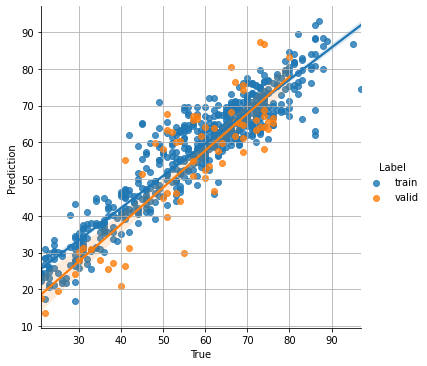

FOLD 4 - EPOCHS 60
MSE  :: [TRAIN] 31.679 | [VALID] 111.540
MAE  :: [TRAIN] 4.232   | [VALID] 8.665
RMSE :: [TRAIN] 5.298  | [VALID] 10.263
CORR :: [TRAIN] 0.943 | [VALID] 0.843
FOLD 4 - EPOCHS 65
MSE  :: [TRAIN] 42.074 | [VALID] 283.261
MAE  :: [TRAIN] 5.155   | [VALID] 14.248
RMSE :: [TRAIN] 6.200  | [VALID] 16.301
CORR :: [TRAIN] 0.923 | [VALID] 0.710


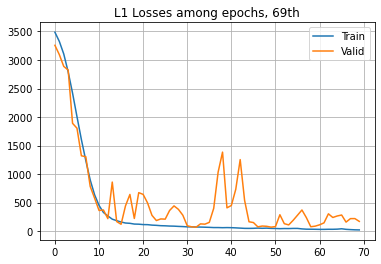

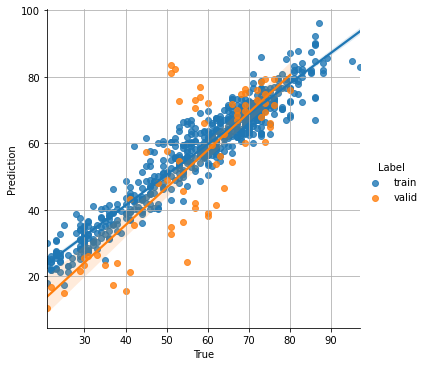

FOLD 4 - EPOCHS 70
MSE  :: [TRAIN] 23.116 | [VALID] 223.090
MAE  :: [TRAIN] 3.645   | [VALID] 11.934
RMSE :: [TRAIN] 4.527  | [VALID] 14.718
CORR :: [TRAIN] 0.959 | [VALID] 0.790
FOLD 4 - EPOCHS 75
MSE  :: [TRAIN] 25.956 | [VALID] 249.976
MAE  :: [TRAIN] 3.936   | [VALID] 13.585
RMSE :: [TRAIN] 4.831  | [VALID] 15.413
CORR :: [TRAIN] 0.954 | [VALID] 0.714


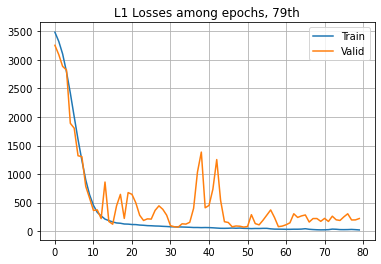

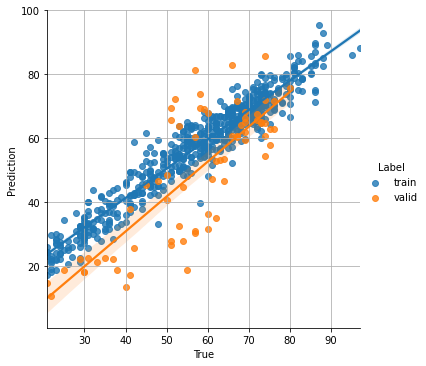

FOLD 4 - EPOCHS 80
MSE  :: [TRAIN] 19.810 | [VALID] 169.805
MAE  :: [TRAIN] 3.461   | [VALID] 10.680
RMSE :: [TRAIN] 4.205  | [VALID] 12.723
CORR :: [TRAIN] 0.965 | [VALID] 0.787
FOLD 4 - EPOCHS 85
MSE  :: [TRAIN] 17.022 | [VALID] 247.566
MAE  :: [TRAIN] 3.145   | [VALID] 12.452
RMSE :: [TRAIN] 3.917  | [VALID] 15.537
CORR :: [TRAIN] 0.970 | [VALID] 0.774


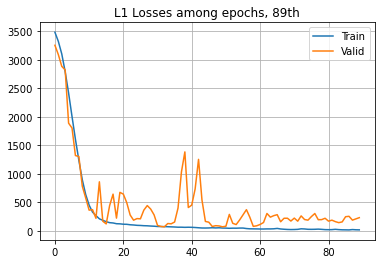

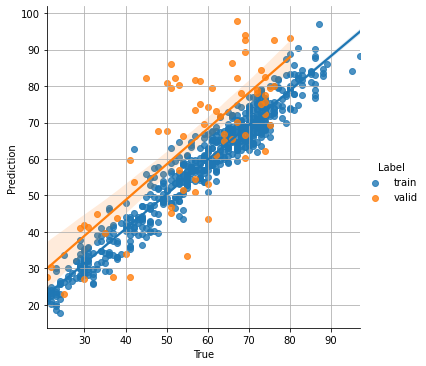

FOLD 4 - EPOCHS 90
MSE  :: [TRAIN] 14.093 | [VALID] 192.501
MAE  :: [TRAIN] 2.846   | [VALID] 10.929
RMSE :: [TRAIN] 3.516  | [VALID] 13.802
CORR :: [TRAIN] 0.975 | [VALID] 0.743
FOLD 4 - EPOCHS 95
MSE  :: [TRAIN] 20.241 | [VALID] 168.031
MAE  :: [TRAIN] 3.440   | [VALID] 10.738
RMSE :: [TRAIN] 4.245  | [VALID] 12.520
CORR :: [TRAIN] 0.964 | [VALID] 0.763


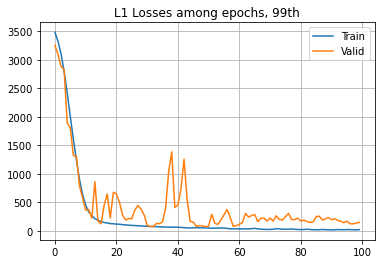

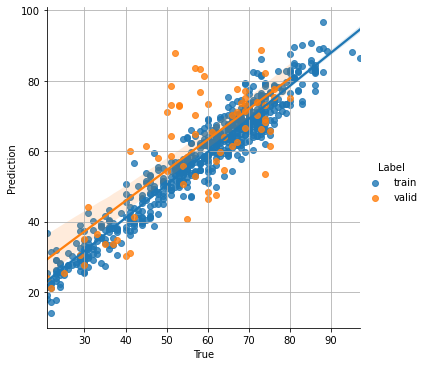

FOLD 4MSE  :: [TEST] 148.124
MAE  :: [TEST] 9.554
RMSE :: [TEST] 11.778
CORR :: [TEST] 0.752


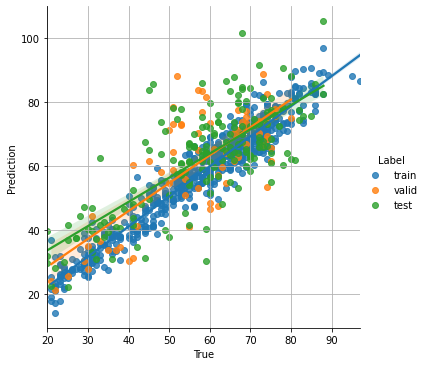

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

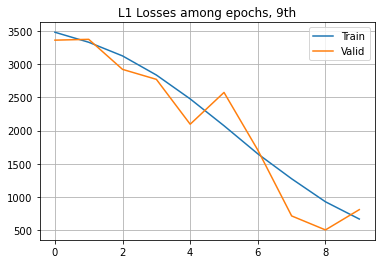

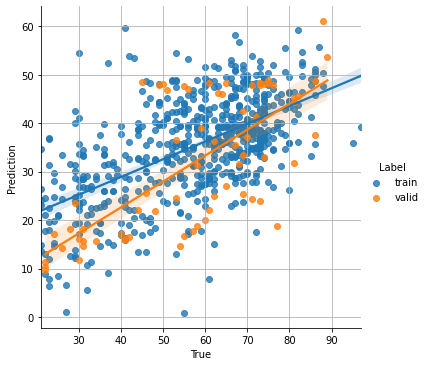

FOLD 5 - EPOCHS 10
MSE  :: [TRAIN] 482.983 | [VALID] 331.926
MAE  :: [TRAIN] 18.766   | [VALID] 15.411
RMSE :: [TRAIN] 21.314  | [VALID] 17.765
CORR :: [TRAIN] 0.590 | [VALID] 0.822
FOLD 5 - EPOCHS 15
MSE  :: [TRAIN] 172.788 | [VALID] 132.503
MAE  :: [TRAIN] 10.582   | [VALID] 9.533
RMSE :: [TRAIN] 12.416  | [VALID] 11.354
CORR :: [TRAIN] 0.655 | [VALID] 0.839


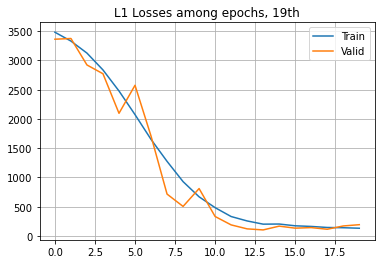

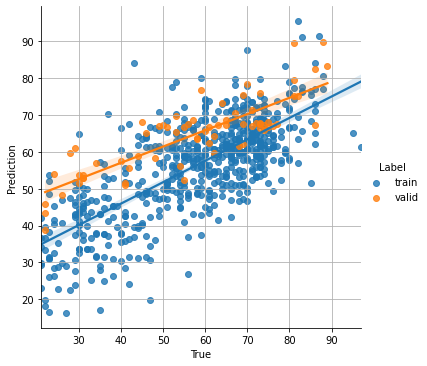

FOLD 5 - EPOCHS 20
MSE  :: [TRAIN] 121.204 | [VALID] 102.208
MAE  :: [TRAIN] 8.906   | [VALID] 8.222
RMSE :: [TRAIN] 10.442  | [VALID] 9.919
CORR :: [TRAIN] 0.750 | [VALID] 0.840
FOLD 5 - EPOCHS 25
MSE  :: [TRAIN] 87.305 | [VALID] 141.278
MAE  :: [TRAIN] 7.470   | [VALID] 9.613
RMSE :: [TRAIN] 8.876  | [VALID] 11.685
CORR :: [TRAIN] 0.825 | [VALID] 0.817


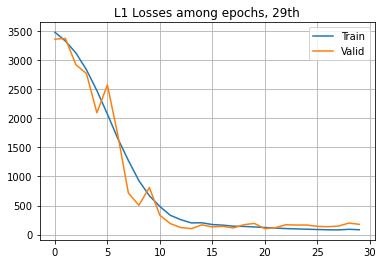

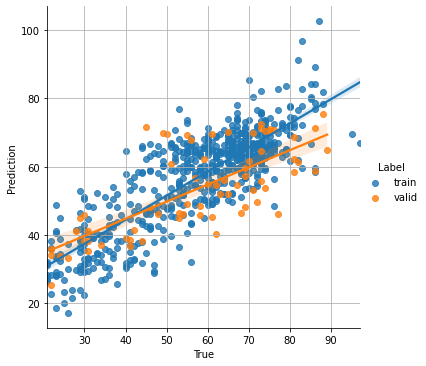

FOLD 5 - EPOCHS 30
MSE  :: [TRAIN] 76.799 | [VALID] 138.249
MAE  :: [TRAIN] 6.985   | [VALID] 9.517
RMSE :: [TRAIN] 8.283  | [VALID] 11.474
CORR :: [TRAIN] 0.848 | [VALID] 0.779
FOLD 5 - EPOCHS 35
MSE  :: [TRAIN] 57.899 | [VALID] 157.849
MAE  :: [TRAIN] 6.006   | [VALID] 9.657
RMSE :: [TRAIN] 7.130  | [VALID] 12.180
CORR :: [TRAIN] 0.888 | [VALID] 0.801


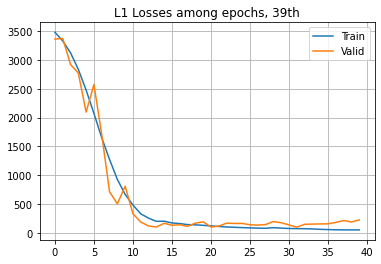

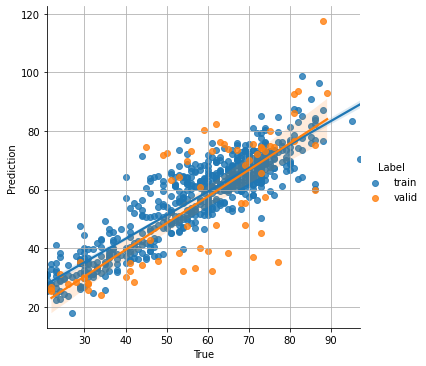

FOLD 5 - EPOCHS 40
MSE  :: [TRAIN] 52.618 | [VALID] 216.706
MAE  :: [TRAIN] 5.639   | [VALID] 11.623
RMSE :: [TRAIN] 6.782  | [VALID] 14.568
CORR :: [TRAIN] 0.898 | [VALID] 0.787
FOLD 5 - EPOCHS 45
MSE  :: [TRAIN] 53.886 | [VALID] 315.351
MAE  :: [TRAIN] 5.707   | [VALID] 14.457
RMSE :: [TRAIN] 6.961  | [VALID] 17.210
CORR :: [TRAIN] 0.896 | [VALID] 0.756


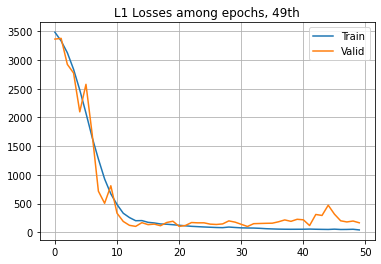

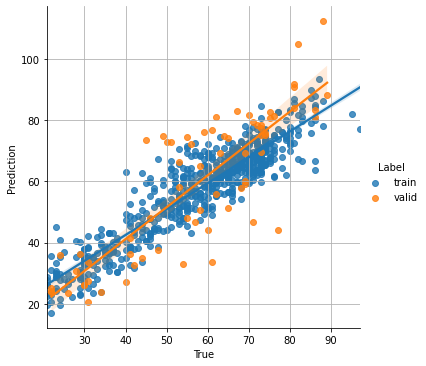

FOLD 5 - EPOCHS 50
MSE  :: [TRAIN] 42.233 | [VALID] 168.177
MAE  :: [TRAIN] 5.037   | [VALID] 10.620
RMSE :: [TRAIN] 6.057  | [VALID] 12.688
CORR :: [TRAIN] 0.919 | [VALID] 0.857
FOLD 5 - EPOCHS 55
MSE  :: [TRAIN] 36.552 | [VALID] 146.134
MAE  :: [TRAIN] 4.714   | [VALID] 9.686
RMSE :: [TRAIN] 5.654  | [VALID] 11.844
CORR :: [TRAIN] 0.930 | [VALID] 0.790


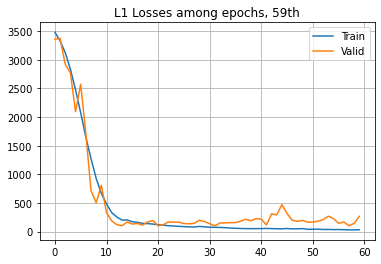

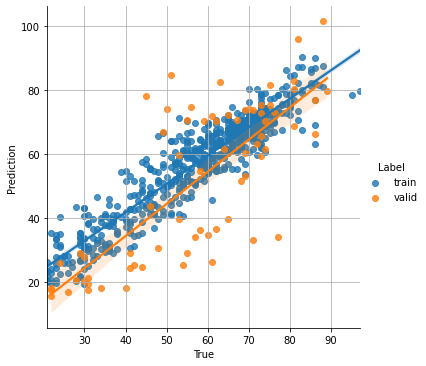

FOLD 5 - EPOCHS 60
MSE  :: [TRAIN] 30.104 | [VALID] 151.617
MAE  :: [TRAIN] 4.172   | [VALID] 9.792
RMSE :: [TRAIN] 5.159  | [VALID] 12.086
CORR :: [TRAIN] 0.943 | [VALID] 0.830
FOLD 5 - EPOCHS 65
MSE  :: [TRAIN] 21.242 | [VALID] 136.243
MAE  :: [TRAIN] 3.628   | [VALID] 9.544
RMSE :: [TRAIN] 4.337  | [VALID] 11.290
CORR :: [TRAIN] 0.960 | [VALID] 0.801


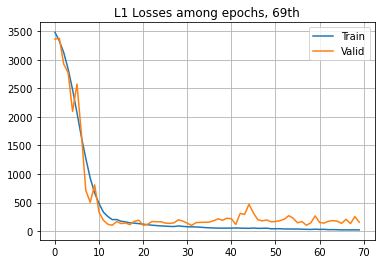

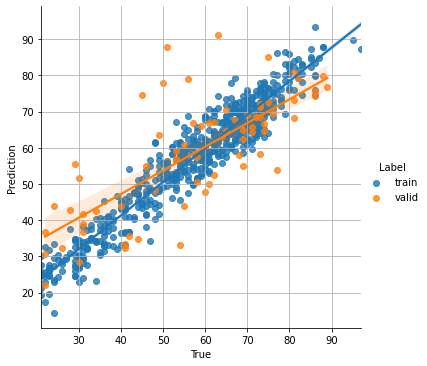

FOLD 5 - EPOCHS 70
MSE  :: [TRAIN] 20.019 | [VALID] 107.015
MAE  :: [TRAIN] 3.519   | [VALID] 8.245
RMSE :: [TRAIN] 4.278  | [VALID] 10.166
CORR :: [TRAIN] 0.962 | [VALID] 0.832
FOLD 5 - EPOCHS 75
MSE  :: [TRAIN] 21.819 | [VALID] 377.844
MAE  :: [TRAIN] 3.722   | [VALID] 15.825
RMSE :: [TRAIN] 4.458  | [VALID] 19.235
CORR :: [TRAIN] 0.959 | [VALID] 0.810


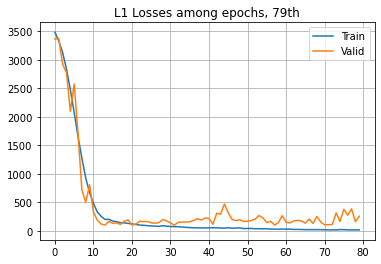

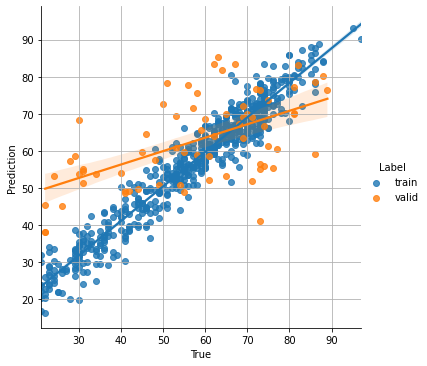

FOLD 5 - EPOCHS 80
MSE  :: [TRAIN] 17.239 | [VALID] 280.531
MAE  :: [TRAIN] 3.247   | [VALID] 13.925
RMSE :: [TRAIN] 3.878  | [VALID] 16.637
CORR :: [TRAIN] 0.968 | [VALID] 0.637
FOLD 5 - EPOCHS 85
MSE  :: [TRAIN] 19.484 | [VALID] 152.141
MAE  :: [TRAIN] 3.525   | [VALID] 9.782
RMSE :: [TRAIN] 4.163  | [VALID] 12.184
CORR :: [TRAIN] 0.964 | [VALID] 0.769


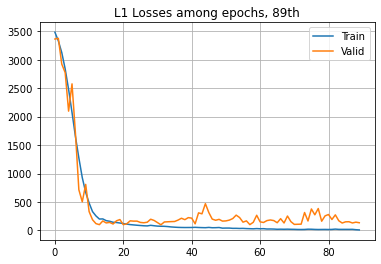

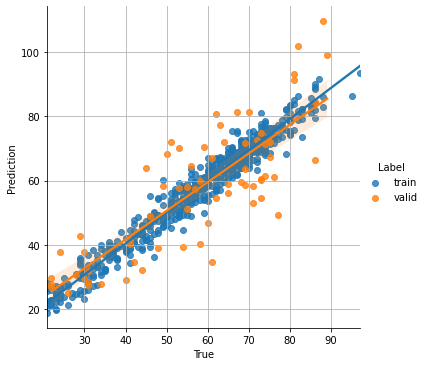

FOLD 5 - EPOCHS 90
MSE  :: [TRAIN] 8.412 | [VALID] 136.792
MAE  :: [TRAIN] 2.266   | [VALID] 9.479
RMSE :: [TRAIN] 2.743  | [VALID] 11.343
CORR :: [TRAIN] 0.985 | [VALID] 0.804
FOLD 5 - EPOCHS 95
MSE  :: [TRAIN] 13.369 | [VALID] 259.407
MAE  :: [TRAIN] 2.855   | [VALID] 13.169
RMSE :: [TRAIN] 3.443  | [VALID] 15.701
CORR :: [TRAIN] 0.975 | [VALID] 0.755


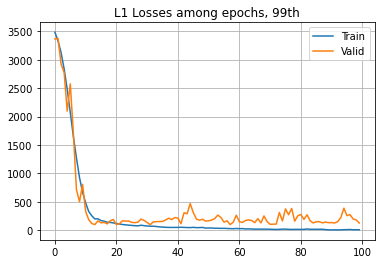

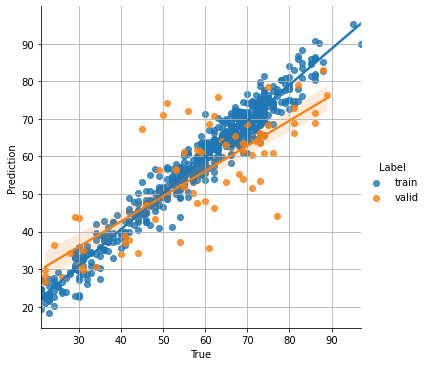

FOLD 5MSE  :: [TEST] 119.131
MAE  :: [TEST] 8.553
RMSE :: [TEST] 10.562
CORR :: [TEST] 0.766


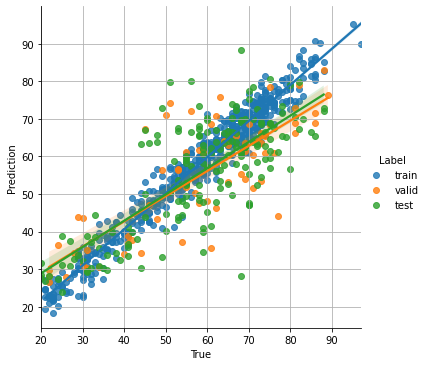

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

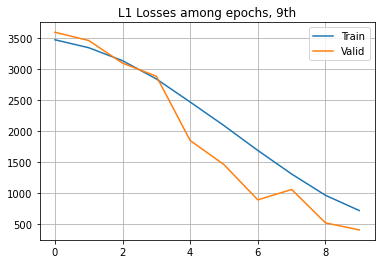

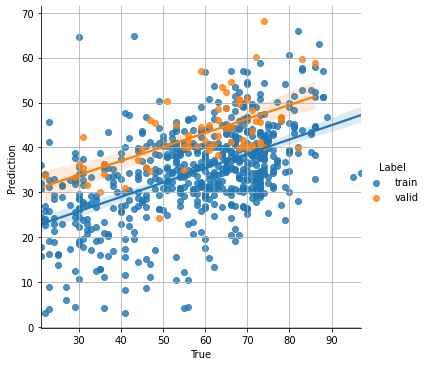

FOLD 6 - EPOCHS 10
MSE  :: [TRAIN] 501.589 | [VALID] 419.227
MAE  :: [TRAIN] 19.214   | [VALID] 18.264
RMSE :: [TRAIN] 21.775  | [VALID] 20.306
CORR :: [TRAIN] 0.593 | [VALID] 0.757
FOLD 6 - EPOCHS 15
MSE  :: [TRAIN] 171.141 | [VALID] 167.828
MAE  :: [TRAIN] 10.604   | [VALID] 10.381
RMSE :: [TRAIN] 12.480  | [VALID] 12.675
CORR :: [TRAIN] 0.671 | [VALID] 0.720


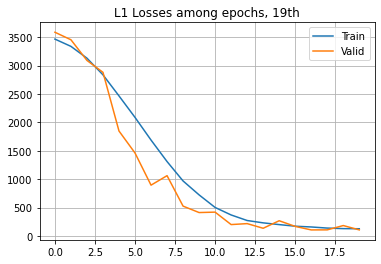

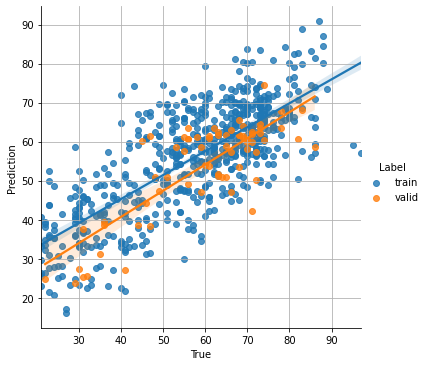

FOLD 6 - EPOCHS 20
MSE  :: [TRAIN] 113.651 | [VALID] 106.752
MAE  :: [TRAIN] 8.508   | [VALID] 8.618
RMSE :: [TRAIN] 10.281  | [VALID] 10.011
CORR :: [TRAIN] 0.780 | [VALID] 0.834
FOLD 6 - EPOCHS 25
MSE  :: [TRAIN] 80.733 | [VALID] 562.023
MAE  :: [TRAIN] 7.104   | [VALID] 20.033
RMSE :: [TRAIN] 8.545  | [VALID] 23.414
CORR :: [TRAIN] 0.848 | [VALID] 0.531


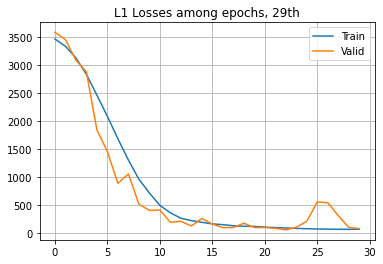

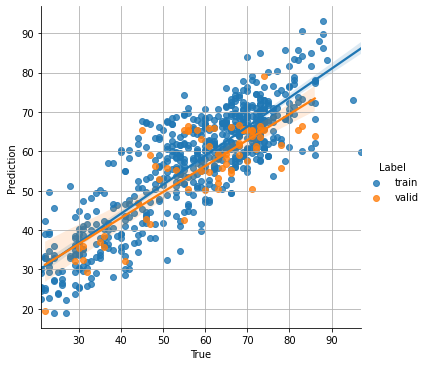

FOLD 6 - EPOCHS 30
MSE  :: [TRAIN] 81.924 | [VALID] 160.072
MAE  :: [TRAIN] 7.163   | [VALID] 10.087
RMSE :: [TRAIN] 8.622  | [VALID] 12.319
CORR :: [TRAIN] 0.845 | [VALID] 0.624
FOLD 6 - EPOCHS 35
MSE  :: [TRAIN] 56.535 | [VALID] 83.376
MAE  :: [TRAIN] 5.860   | [VALID] 7.663
RMSE :: [TRAIN] 7.063  | [VALID] 8.923
CORR :: [TRAIN] 0.896 | [VALID] 0.792


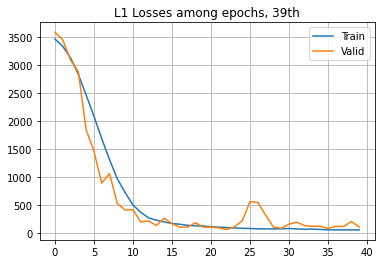

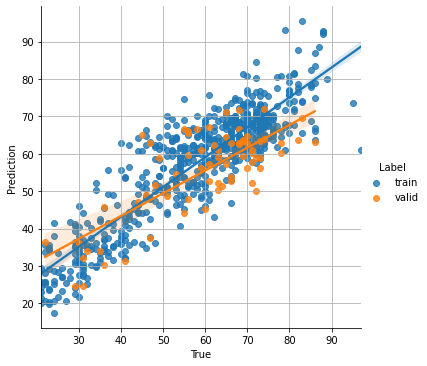

FOLD 6 - EPOCHS 40
MSE  :: [TRAIN] 52.920 | [VALID] 110.609
MAE  :: [TRAIN] 5.663   | [VALID] 8.658
RMSE :: [TRAIN] 6.890  | [VALID] 10.200
CORR :: [TRAIN] 0.903 | [VALID] 0.752
FOLD 6 - EPOCHS 45
MSE  :: [TRAIN] 50.259 | [VALID] 256.581
MAE  :: [TRAIN] 5.512   | [VALID] 14.156
RMSE :: [TRAIN] 6.763  | [VALID] 15.683
CORR :: [TRAIN] 0.908 | [VALID] 0.733


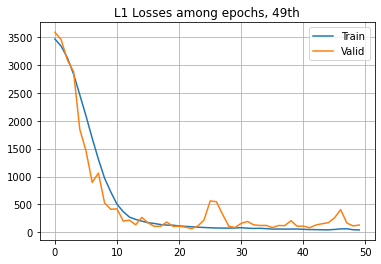

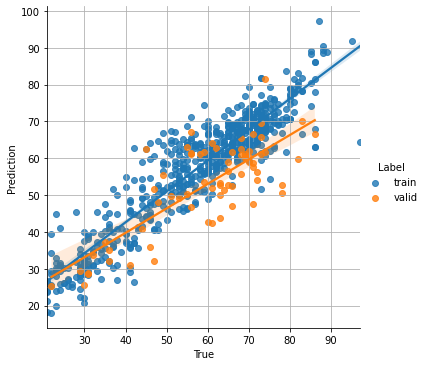

FOLD 6 - EPOCHS 50
MSE  :: [TRAIN] 37.936 | [VALID] 241.133
MAE  :: [TRAIN] 4.632   | [VALID] 13.037
RMSE :: [TRAIN] 5.770  | [VALID] 15.172
CORR :: [TRAIN] 0.931 | [VALID] 0.723
FOLD 6 - EPOCHS 55
MSE  :: [TRAIN] 30.095 | [VALID] 210.670
MAE  :: [TRAIN] 4.193   | [VALID] 11.999
RMSE :: [TRAIN] 5.119  | [VALID] 14.079
CORR :: [TRAIN] 0.946 | [VALID] 0.596


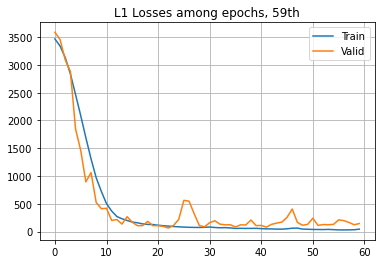

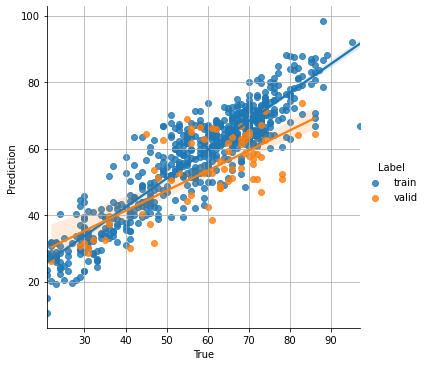

FOLD 6 - EPOCHS 60
MSE  :: [TRAIN] 40.851 | [VALID] 132.767
MAE  :: [TRAIN] 4.922   | [VALID] 9.934
RMSE :: [TRAIN] 6.049  | [VALID] 11.440
CORR :: [TRAIN] 0.926 | [VALID] 0.713
FOLD 6 - EPOCHS 65
MSE  :: [TRAIN] 27.101 | [VALID] 103.640
MAE  :: [TRAIN] 3.970   | [VALID] 7.827
RMSE :: [TRAIN] 4.856  | [VALID] 9.696
CORR :: [TRAIN] 0.951 | [VALID] 0.760


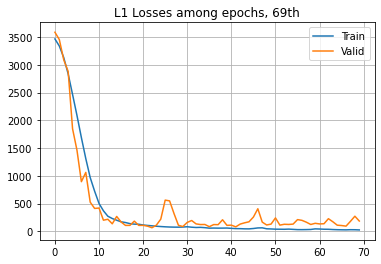

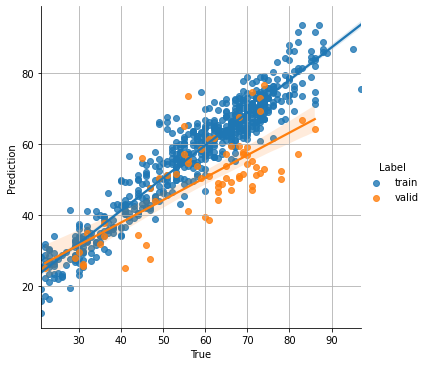

FOLD 6 - EPOCHS 70
MSE  :: [TRAIN] 28.115 | [VALID] 224.848
MAE  :: [TRAIN] 4.096   | [VALID] 12.496
RMSE :: [TRAIN] 4.988  | [VALID] 14.715
CORR :: [TRAIN] 0.950 | [VALID] 0.686
FOLD 6 - EPOCHS 75
MSE  :: [TRAIN] 19.928 | [VALID] 114.465
MAE  :: [TRAIN] 3.456   | [VALID] 8.876
RMSE :: [TRAIN] 4.247  | [VALID] 10.496
CORR :: [TRAIN] 0.965 | [VALID] 0.802


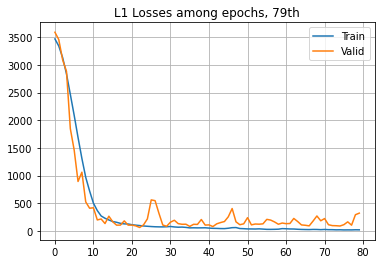

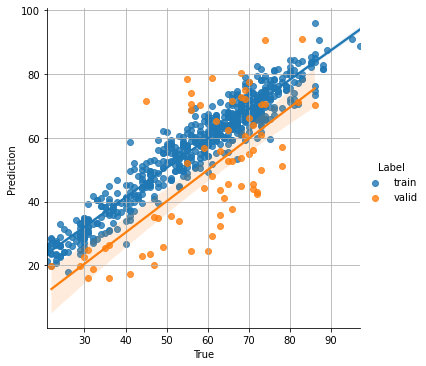

FOLD 6 - EPOCHS 80
MSE  :: [TRAIN] 22.621 | [VALID] 158.578
MAE  :: [TRAIN] 3.666   | [VALID] 10.081
RMSE :: [TRAIN] 4.451  | [VALID] 12.225
CORR :: [TRAIN] 0.960 | [VALID] 0.769
FOLD 6 - EPOCHS 85
MSE  :: [TRAIN] 21.083 | [VALID] 123.576
MAE  :: [TRAIN] 3.641   | [VALID] 9.046
RMSE :: [TRAIN] 4.375  | [VALID] 10.809
CORR :: [TRAIN] 0.963 | [VALID] 0.741


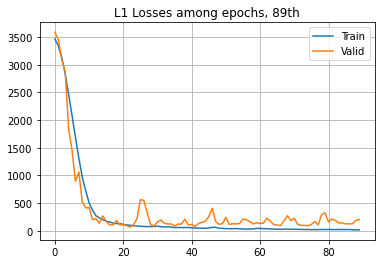

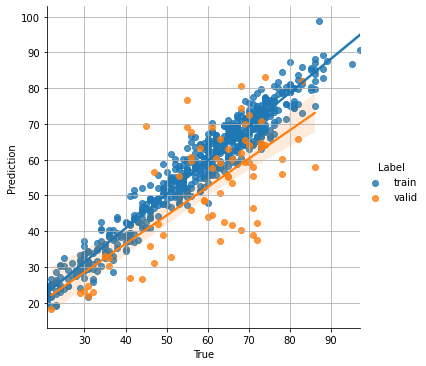

FOLD 6 - EPOCHS 90
MSE  :: [TRAIN] 15.531 | [VALID] 97.473
MAE  :: [TRAIN] 3.084   | [VALID] 7.855
RMSE :: [TRAIN] 3.737  | [VALID] 9.631
CORR :: [TRAIN] 0.972 | [VALID] 0.770
FOLD 6 - EPOCHS 95
MSE  :: [TRAIN] 10.228 | [VALID] 142.436
MAE  :: [TRAIN] 2.541   | [VALID] 9.848
RMSE :: [TRAIN] 3.030  | [VALID] 11.431
CORR :: [TRAIN] 0.982 | [VALID] 0.728


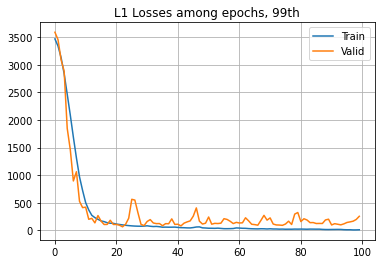

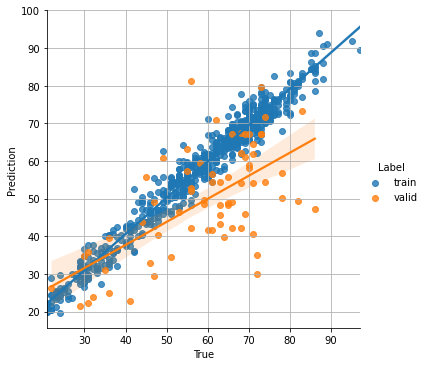

FOLD 6MSE  :: [TEST] 225.328
MAE  :: [TEST] 12.403
RMSE :: [TEST] 14.729
CORR :: [TEST] 0.705


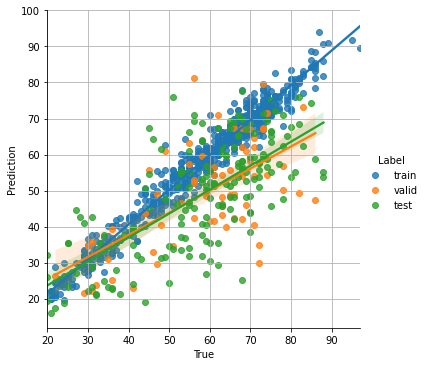

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

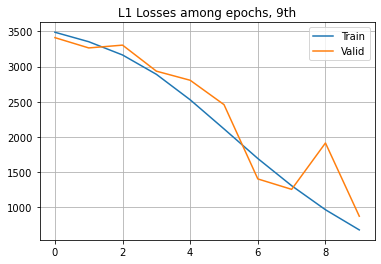

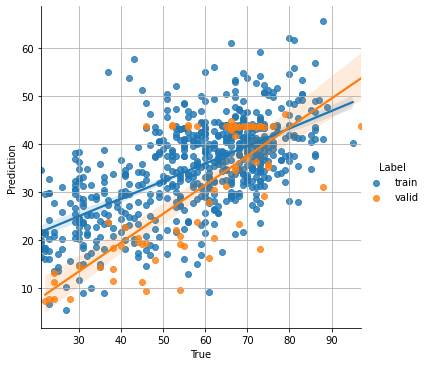

FOLD 7 - EPOCHS 10
MSE  :: [TRAIN] 472.621 | [VALID] 1629.439
MAE  :: [TRAIN] 18.714   | [VALID] 36.318
RMSE :: [TRAIN] 21.145  | [VALID] 39.842
CORR :: [TRAIN] 0.628 | [VALID] 0.489
FOLD 7 - EPOCHS 15
MSE  :: [TRAIN] 164.600 | [VALID] 233.009
MAE  :: [TRAIN] 10.536   | [VALID] 12.558
RMSE :: [TRAIN] 12.331  | [VALID] 14.495
CORR :: [TRAIN] 0.685 | [VALID] 0.521


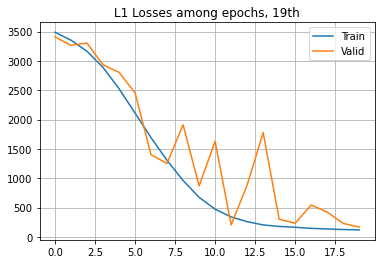

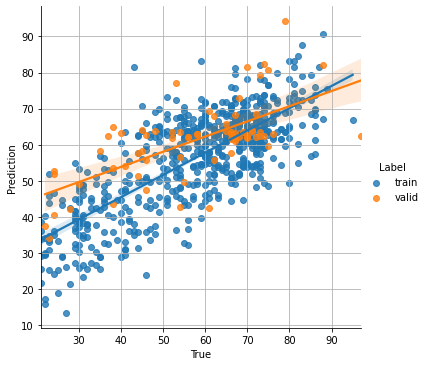

FOLD 7 - EPOCHS 20
MSE  :: [TRAIN] 112.631 | [VALID] 89.746
MAE  :: [TRAIN] 8.634   | [VALID] 7.285
RMSE :: [TRAIN] 10.230  | [VALID] 9.148
CORR :: [TRAIN] 0.776 | [VALID] 0.828
FOLD 7 - EPOCHS 25
MSE  :: [TRAIN] 97.979 | [VALID] 96.504
MAE  :: [TRAIN] 8.103   | [VALID] 7.732
RMSE :: [TRAIN] 9.551  | [VALID] 9.572
CORR :: [TRAIN] 0.807 | [VALID] 0.831


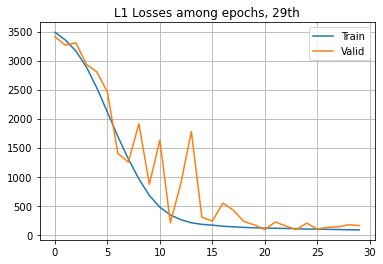

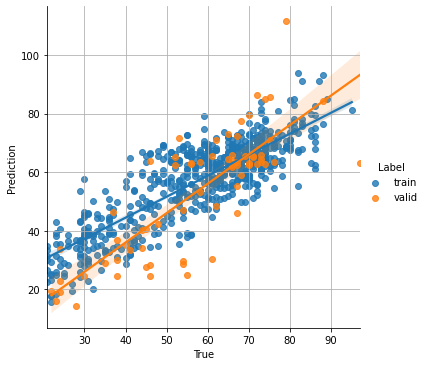

FOLD 7 - EPOCHS 30
MSE  :: [TRAIN] 81.050 | [VALID] 158.281
MAE  :: [TRAIN] 7.333   | [VALID] 10.113
RMSE :: [TRAIN] 8.693  | [VALID] 12.363
CORR :: [TRAIN] 0.843 | [VALID] 0.758
FOLD 7 - EPOCHS 35
MSE  :: [TRAIN] 69.711 | [VALID] 155.074
MAE  :: [TRAIN] 6.806   | [VALID] 9.821
RMSE :: [TRAIN] 8.048  | [VALID] 11.982
CORR :: [TRAIN] 0.866 | [VALID] 0.750


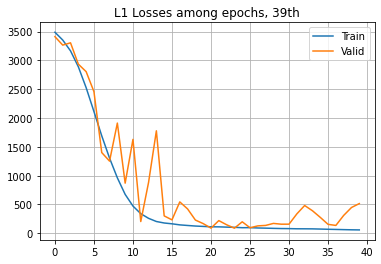

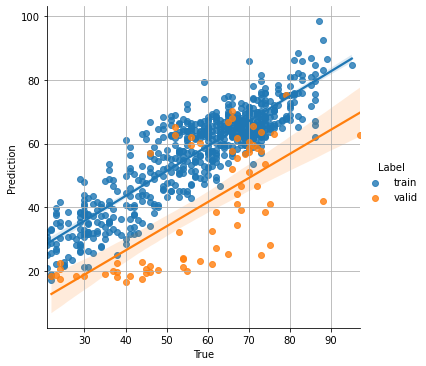

FOLD 7 - EPOCHS 40
MSE  :: [TRAIN] 59.533 | [VALID] 398.082
MAE  :: [TRAIN] 6.263   | [VALID] 16.733
RMSE :: [TRAIN] 7.383  | [VALID] 19.344
CORR :: [TRAIN] 0.887 | [VALID] 0.732
FOLD 7 - EPOCHS 45
MSE  :: [TRAIN] 49.414 | [VALID] 280.027
MAE  :: [TRAIN] 5.659   | [VALID] 13.452
RMSE :: [TRAIN] 6.746  | [VALID] 15.880
CORR :: [TRAIN] 0.907 | [VALID] 0.733


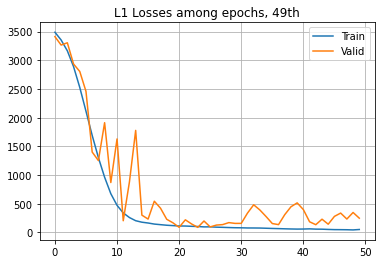

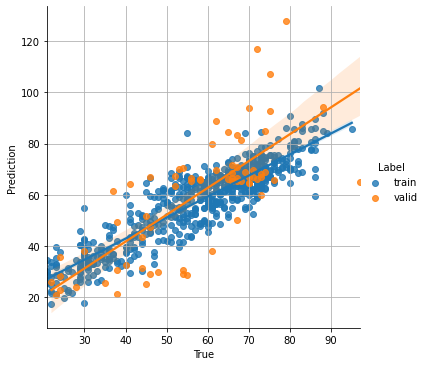

FOLD 7 - EPOCHS 50
MSE  :: [TRAIN] 50.363 | [VALID] 223.864
MAE  :: [TRAIN] 5.667   | [VALID] 11.874
RMSE :: [TRAIN] 6.799  | [VALID] 14.780
CORR :: [TRAIN] 0.905 | [VALID] 0.729
FOLD 7 - EPOCHS 55
MSE  :: [TRAIN] 45.039 | [VALID] 134.268
MAE  :: [TRAIN] 5.425   | [VALID] 8.827
RMSE :: [TRAIN] 6.442  | [VALID] 11.088
CORR :: [TRAIN] 0.916 | [VALID] 0.841


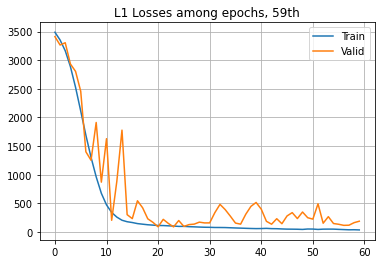

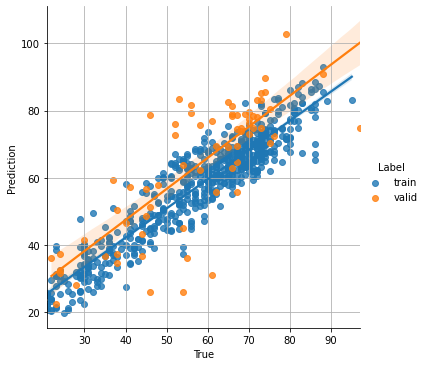

FOLD 7 - EPOCHS 60
MSE  :: [TRAIN] 38.430 | [VALID] 135.716
MAE  :: [TRAIN] 4.878   | [VALID] 9.536
RMSE :: [TRAIN] 5.966  | [VALID] 11.177
CORR :: [TRAIN] 0.929 | [VALID] 0.727
FOLD 7 - EPOCHS 65
MSE  :: [TRAIN] 40.470 | [VALID] 391.489
MAE  :: [TRAIN] 5.096   | [VALID] 17.099
RMSE :: [TRAIN] 6.153  | [VALID] 19.211
CORR :: [TRAIN] 0.925 | [VALID] 0.714


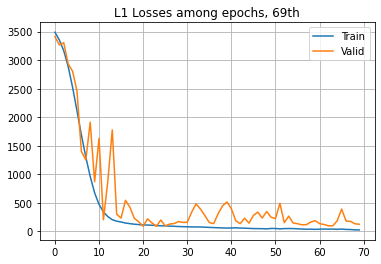

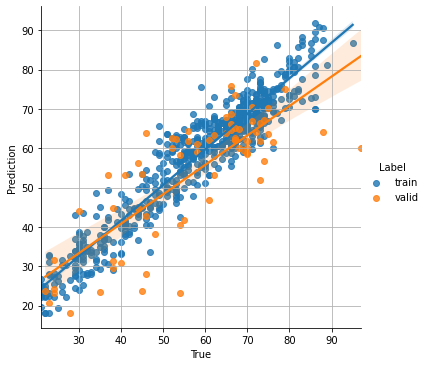

FOLD 7 - EPOCHS 70
MSE  :: [TRAIN] 27.222 | [VALID] 143.808
MAE  :: [TRAIN] 4.059   | [VALID] 9.388
RMSE :: [TRAIN] 4.969  | [VALID] 11.542
CORR :: [TRAIN] 0.950 | [VALID] 0.789
FOLD 7 - EPOCHS 75
MSE  :: [TRAIN] 23.379 | [VALID] 213.428
MAE  :: [TRAIN] 3.811   | [VALID] 12.003
RMSE :: [TRAIN] 4.640  | [VALID] 14.529
CORR :: [TRAIN] 0.957 | [VALID] 0.709


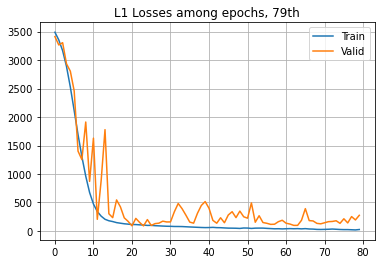

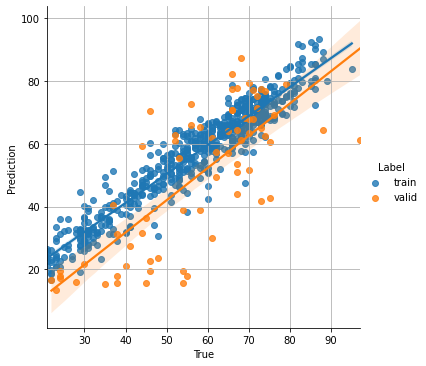

FOLD 7 - EPOCHS 80
MSE  :: [TRAIN] 32.433 | [VALID] 115.672
MAE  :: [TRAIN] 4.410   | [VALID] 8.377
RMSE :: [TRAIN] 5.396  | [VALID] 10.414
CORR :: [TRAIN] 0.940 | [VALID] 0.796
FOLD 7 - EPOCHS 85
MSE  :: [TRAIN] 18.680 | [VALID] 158.728
MAE  :: [TRAIN] 3.447   | [VALID] 9.975
RMSE :: [TRAIN] 4.118  | [VALID] 12.432
CORR :: [TRAIN] 0.966 | [VALID] 0.800


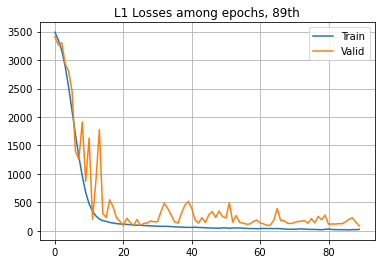

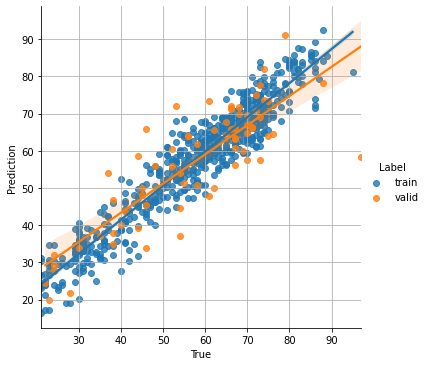

FOLD 7 - EPOCHS 90
MSE  :: [TRAIN] 18.328 | [VALID] 134.748
MAE  :: [TRAIN] 3.413   | [VALID] 9.119
RMSE :: [TRAIN] 4.111  | [VALID] 10.880
CORR :: [TRAIN] 0.967 | [VALID] 0.752
FOLD 7 - EPOCHS 95
MSE  :: [TRAIN] 19.225 | [VALID] 115.988
MAE  :: [TRAIN] 3.490   | [VALID] 8.408
RMSE :: [TRAIN] 4.198  | [VALID] 10.286
CORR :: [TRAIN] 0.965 | [VALID] 0.804


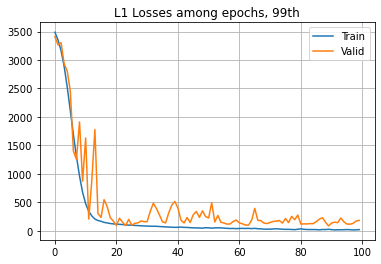

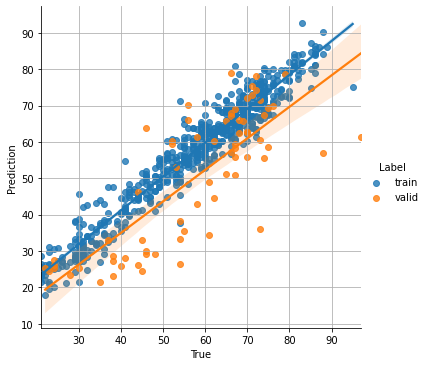

FOLD 7MSE  :: [TEST] 202.585
MAE  :: [TEST] 11.524
RMSE :: [TEST] 13.888
CORR :: [TEST] 0.752


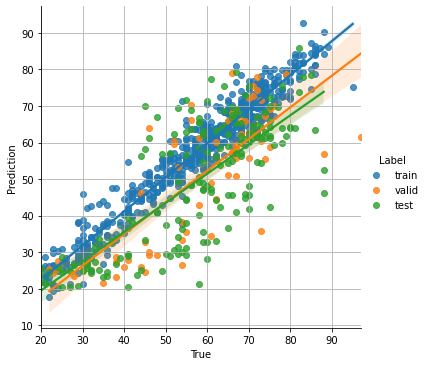

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

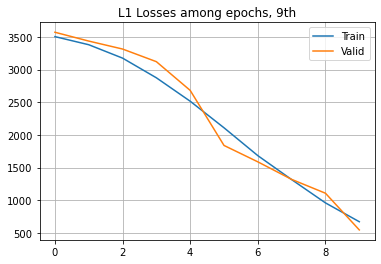

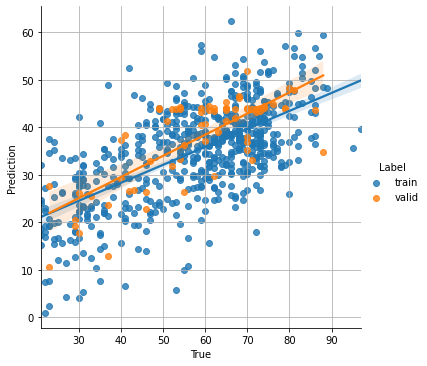

FOLD 8 - EPOCHS 10
MSE  :: [TRAIN] 468.081 | [VALID] 287.257
MAE  :: [TRAIN] 18.596   | [VALID] 14.170
RMSE :: [TRAIN] 21.078  | [VALID] 16.520
CORR :: [TRAIN] 0.649 | [VALID] 0.782
FOLD 8 - EPOCHS 15
MSE  :: [TRAIN] 154.015 | [VALID] 115.752
MAE  :: [TRAIN] 10.146   | [VALID] 8.634
RMSE :: [TRAIN] 11.806  | [VALID] 10.179
CORR :: [TRAIN] 0.706 | [VALID] 0.796


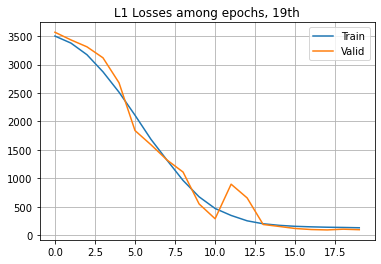

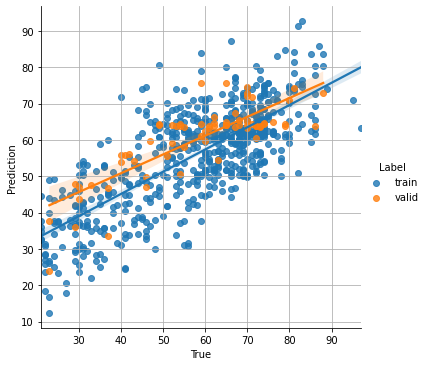

FOLD 8 - EPOCHS 20
MSE  :: [TRAIN] 118.954 | [VALID] 149.978
MAE  :: [TRAIN] 8.905   | [VALID] 10.023
RMSE :: [TRAIN] 10.481  | [VALID] 12.111
CORR :: [TRAIN] 0.766 | [VALID] 0.670
FOLD 8 - EPOCHS 25
MSE  :: [TRAIN] 88.924 | [VALID] 103.950
MAE  :: [TRAIN] 7.634   | [VALID] 8.103
RMSE :: [TRAIN] 9.057  | [VALID] 9.847
CORR :: [TRAIN] 0.829 | [VALID] 0.779


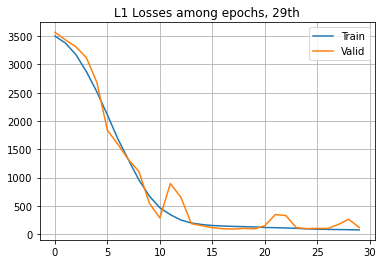

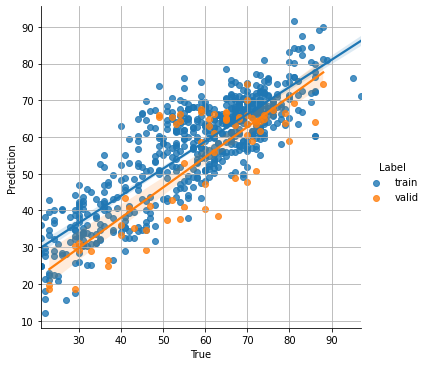

FOLD 8 - EPOCHS 30
MSE  :: [TRAIN] 73.129 | [VALID] 89.613
MAE  :: [TRAIN] 6.928   | [VALID] 7.727
RMSE :: [TRAIN] 8.207  | [VALID] 9.121
CORR :: [TRAIN] 0.862 | [VALID] 0.807
FOLD 8 - EPOCHS 35
MSE  :: [TRAIN] 65.447 | [VALID] 242.965
MAE  :: [TRAIN] 6.522   | [VALID] 12.399
RMSE :: [TRAIN] 7.740  | [VALID] 15.297
CORR :: [TRAIN] 0.877 | [VALID] 0.673


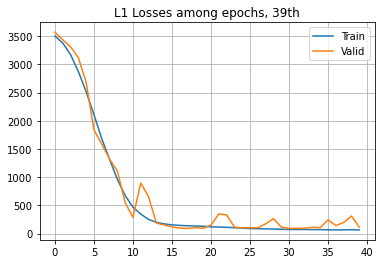

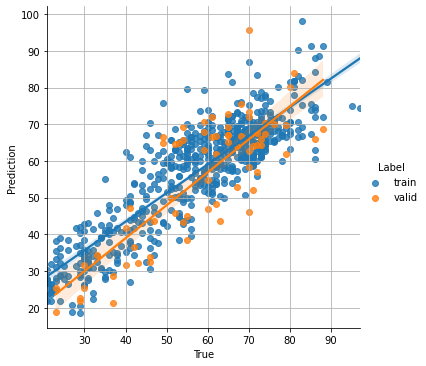

FOLD 8 - EPOCHS 40
MSE  :: [TRAIN] 60.449 | [VALID] 86.379
MAE  :: [TRAIN] 6.311   | [VALID] 7.587
RMSE :: [TRAIN] 7.496  | [VALID] 9.062
CORR :: [TRAIN] 0.887 | [VALID] 0.824
FOLD 8 - EPOCHS 45
MSE  :: [TRAIN] 45.322 | [VALID] 108.153
MAE  :: [TRAIN] 5.286   | [VALID] 8.540
RMSE :: [TRAIN] 6.394  | [VALID] 9.993
CORR :: [TRAIN] 0.916 | [VALID] 0.813


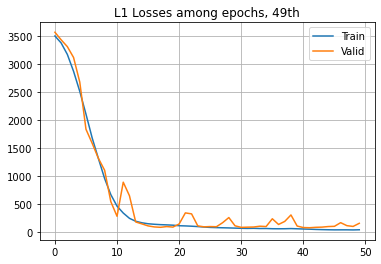

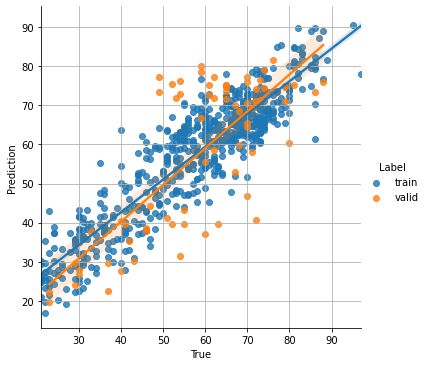

FOLD 8 - EPOCHS 50
MSE  :: [TRAIN] 50.357 | [VALID] 182.741
MAE  :: [TRAIN] 5.813   | [VALID] 10.864
RMSE :: [TRAIN] 6.801  | [VALID] 13.187
CORR :: [TRAIN] 0.907 | [VALID] 0.734
FOLD 8 - EPOCHS 55
MSE  :: [TRAIN] 44.577 | [VALID] 106.207
MAE  :: [TRAIN] 5.299   | [VALID] 8.643
RMSE :: [TRAIN] 6.387  | [VALID] 10.075
CORR :: [TRAIN] 0.918 | [VALID] 0.834


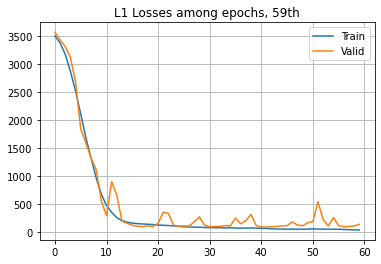

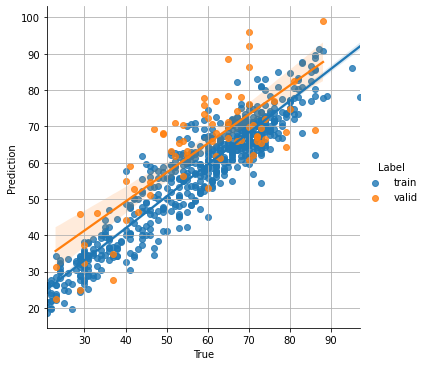

FOLD 8 - EPOCHS 60
MSE  :: [TRAIN] 33.728 | [VALID] 86.942
MAE  :: [TRAIN] 4.565   | [VALID] 7.614
RMSE :: [TRAIN] 5.557  | [VALID] 9.182
CORR :: [TRAIN] 0.938 | [VALID] 0.802
FOLD 8 - EPOCHS 65
MSE  :: [TRAIN] 36.681 | [VALID] 115.353
MAE  :: [TRAIN] 4.711   | [VALID] 8.753
RMSE :: [TRAIN] 5.763  | [VALID] 10.454
CORR :: [TRAIN] 0.933 | [VALID] 0.749


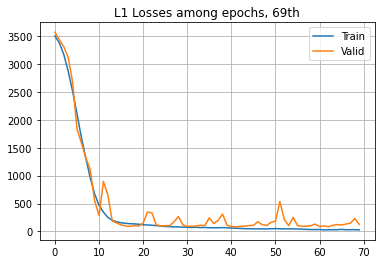

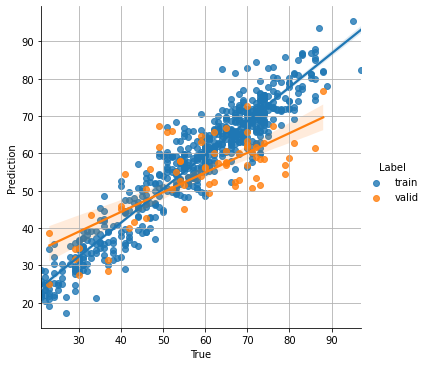

FOLD 8 - EPOCHS 70
MSE  :: [TRAIN] 29.465 | [VALID] 139.094
MAE  :: [TRAIN] 4.245   | [VALID] 9.894
RMSE :: [TRAIN] 5.184  | [VALID] 11.514
CORR :: [TRAIN] 0.946 | [VALID] 0.765
FOLD 8 - EPOCHS 75
MSE  :: [TRAIN] 30.048 | [VALID] 112.750
MAE  :: [TRAIN] 4.325   | [VALID] 8.707
RMSE :: [TRAIN] 5.210  | [VALID] 10.351
CORR :: [TRAIN] 0.945 | [VALID] 0.797


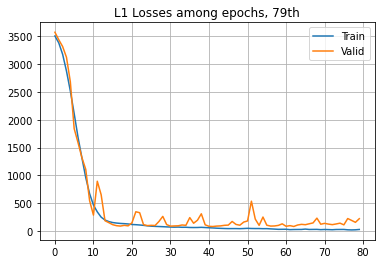

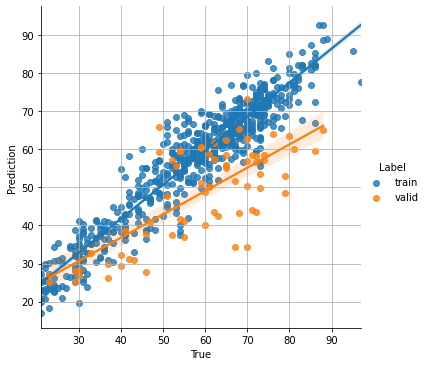

FOLD 8 - EPOCHS 80
MSE  :: [TRAIN] 26.936 | [VALID] 107.502
MAE  :: [TRAIN] 4.076   | [VALID] 8.455
RMSE :: [TRAIN] 4.961  | [VALID] 10.145
CORR :: [TRAIN] 0.951 | [VALID] 0.781
FOLD 8 - EPOCHS 85
MSE  :: [TRAIN] 16.408 | [VALID] 114.334
MAE  :: [TRAIN] 3.115   | [VALID] 9.207
RMSE :: [TRAIN] 3.776  | [VALID] 10.546
CORR :: [TRAIN] 0.971 | [VALID] 0.824


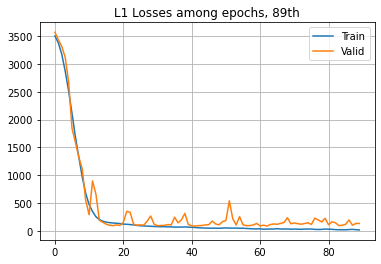

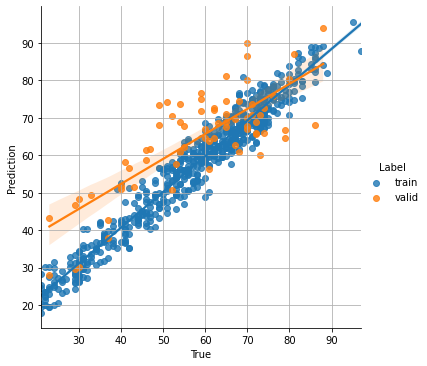

FOLD 8 - EPOCHS 90
MSE  :: [TRAIN] 16.312 | [VALID] 93.368
MAE  :: [TRAIN] 3.135   | [VALID] 7.449
RMSE :: [TRAIN] 3.830  | [VALID] 9.439
CORR :: [TRAIN] 0.971 | [VALID] 0.814
FOLD 8 - EPOCHS 95
MSE  :: [TRAIN] 25.240 | [VALID] 241.523
MAE  :: [TRAIN] 4.027   | [VALID] 13.241
RMSE :: [TRAIN] 4.864  | [VALID] 15.409
CORR :: [TRAIN] 0.955 | [VALID] 0.435


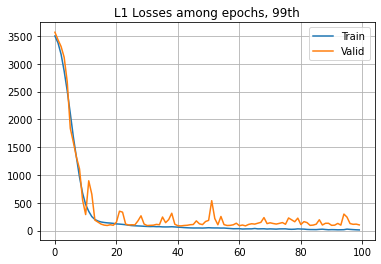

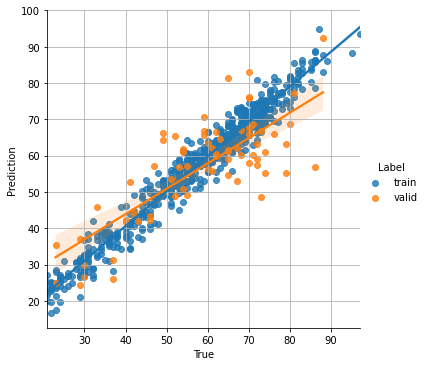

FOLD 8MSE  :: [TEST] 115.916
MAE  :: [TEST] 8.610
RMSE :: [TEST] 10.494
CORR :: [TEST] 0.779


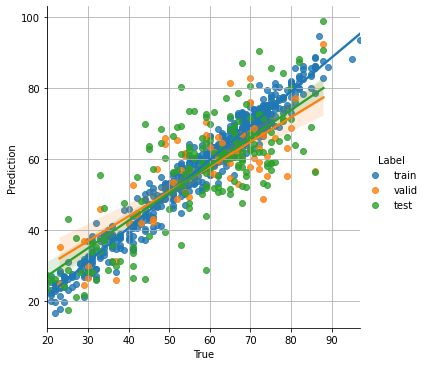

Model Dinsdale is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 96, 96]             448
       BatchNorm3d-2       [-1, 16, 96, 96, 96]              32
       BasicConv3d-3       [-1, 16, 96, 96, 96]               0
            Conv3d-4       [-1, 16, 96, 96, 96]           6,928
       BatchNorm3d-5       [-1, 16, 96, 96, 96]              32
         MaxPool3d-6       [-1, 16, 48, 48, 48]               0
       BasicConv3d-7       [-1, 16, 48, 48, 48]               0
            Conv3d-8       [-1, 32, 48, 48, 48]          13,856
       BatchNorm3d-9       [-1, 32, 48, 48, 48]              64
      BasicConv3d-10       [-1, 32, 48, 48, 48]               0
           Conv3d-11       [-1, 32, 48, 48, 48]          27,680
      BatchNorm3d-12       [-1, 32, 48, 48, 48]              64
        MaxPool3d-13       [-1, 32, 24, 24, 24]               0
      Basic

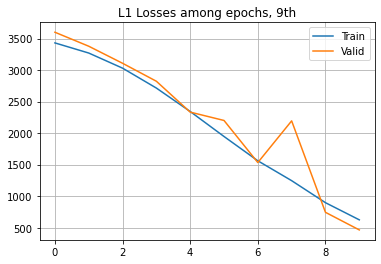

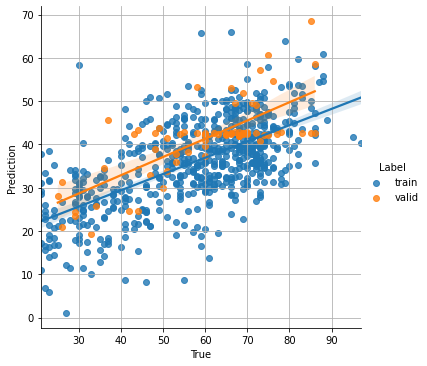

FOLD 9 - EPOCHS 10
MSE  :: [TRAIN] 438.216 | [VALID] 348.506
MAE  :: [TRAIN] 17.792   | [VALID] 16.788
RMSE :: [TRAIN] 20.445  | [VALID] 18.549
CORR :: [TRAIN] 0.638 | [VALID] 0.827
FOLD 9 - EPOCHS 15
MSE  :: [TRAIN] 148.672 | [VALID] 130.003
MAE  :: [TRAIN] 9.922   | [VALID] 9.410
RMSE :: [TRAIN] 11.691  | [VALID] 11.133
CORR :: [TRAIN] 0.714 | [VALID] 0.834


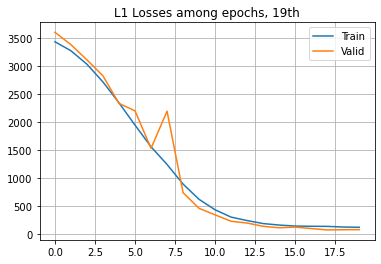

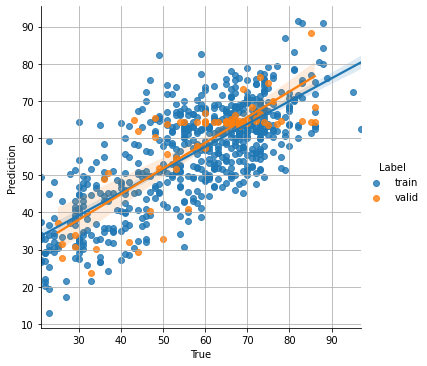

FOLD 9 - EPOCHS 20
MSE  :: [TRAIN] 120.328 | [VALID] 94.163
MAE  :: [TRAIN] 8.853   | [VALID] 7.804
RMSE :: [TRAIN] 10.563  | [VALID] 9.406
CORR :: [TRAIN] 0.763 | [VALID] 0.787
FOLD 9 - EPOCHS 25
MSE  :: [TRAIN] 103.510 | [VALID] 213.182
MAE  :: [TRAIN] 8.117   | [VALID] 11.370
RMSE :: [TRAIN] 9.805  | [VALID] 13.672
CORR :: [TRAIN] 0.798 | [VALID] 0.640


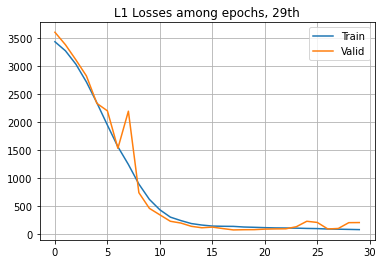

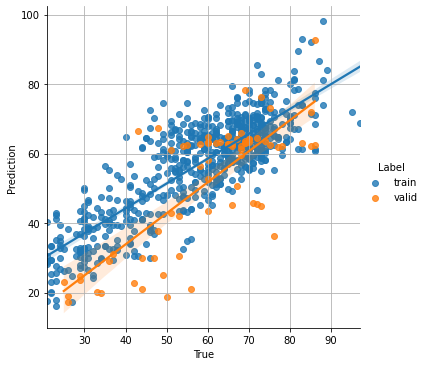

FOLD 9 - EPOCHS 30
MSE  :: [TRAIN] 84.799 | [VALID] 251.649
MAE  :: [TRAIN] 7.488   | [VALID] 12.224
RMSE :: [TRAIN] 8.919  | [VALID] 14.779
CORR :: [TRAIN] 0.838 | [VALID] 0.730
FOLD 9 - EPOCHS 35
MSE  :: [TRAIN] 70.737 | [VALID] 204.918
MAE  :: [TRAIN] 6.794   | [VALID] 11.233
RMSE :: [TRAIN] 8.143  | [VALID] 13.650
CORR :: [TRAIN] 0.866 | [VALID] 0.775


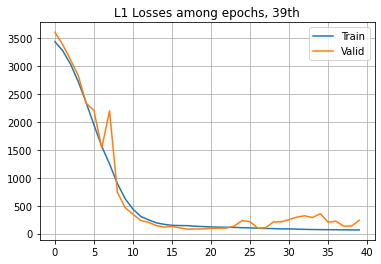

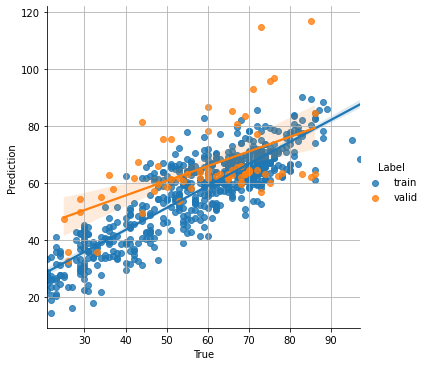

FOLD 9 - EPOCHS 40
MSE  :: [TRAIN] 64.067 | [VALID] 215.695
MAE  :: [TRAIN] 6.502   | [VALID] 11.595
RMSE :: [TRAIN] 7.724  | [VALID] 14.104
CORR :: [TRAIN] 0.880 | [VALID] 0.653
FOLD 9 - EPOCHS 45
MSE  :: [TRAIN] 55.239 | [VALID] 309.302
MAE  :: [TRAIN] 5.991   | [VALID] 13.942
RMSE :: [TRAIN] 7.127  | [VALID] 16.298
CORR :: [TRAIN] 0.898 | [VALID] 0.520


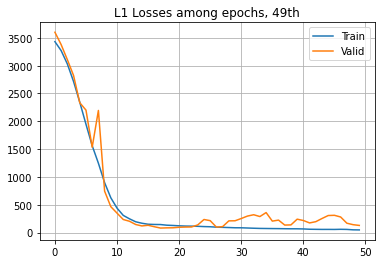

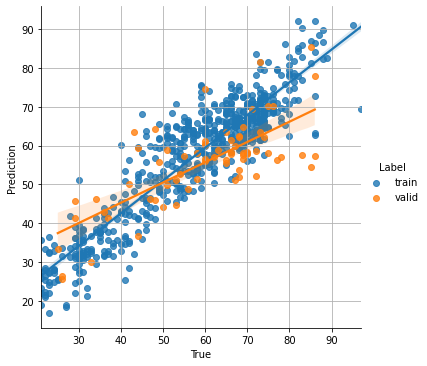

FOLD 9 - EPOCHS 50
MSE  :: [TRAIN] 50.393 | [VALID] 109.408
MAE  :: [TRAIN] 5.712   | [VALID] 8.169
RMSE :: [TRAIN] 6.801  | [VALID] 10.024
CORR :: [TRAIN] 0.907 | [VALID] 0.808
FOLD 9 - EPOCHS 55
MSE  :: [TRAIN] 33.897 | [VALID] 196.815
MAE  :: [TRAIN] 4.623   | [VALID] 11.229
RMSE :: [TRAIN] 5.572  | [VALID] 13.739
CORR :: [TRAIN] 0.939 | [VALID] 0.730


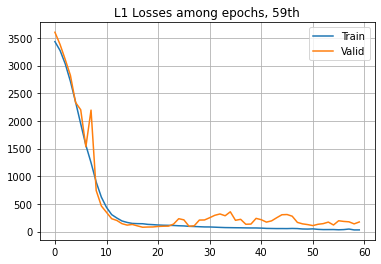

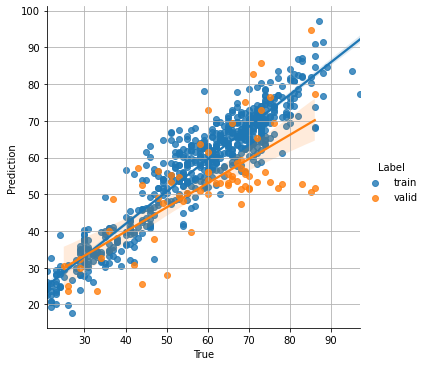

FOLD 9 - EPOCHS 60
MSE  :: [TRAIN] 31.657 | [VALID] 166.387
MAE  :: [TRAIN] 4.374   | [VALID] 10.268
RMSE :: [TRAIN] 5.305  | [VALID] 12.527
CORR :: [TRAIN] 0.943 | [VALID] 0.750
FOLD 9 - EPOCHS 65
MSE  :: [TRAIN] 22.378 | [VALID] 187.559
MAE  :: [TRAIN] 3.664   | [VALID] 11.255
RMSE :: [TRAIN] 4.483  | [VALID] 13.407
CORR :: [TRAIN] 0.960 | [VALID] 0.795


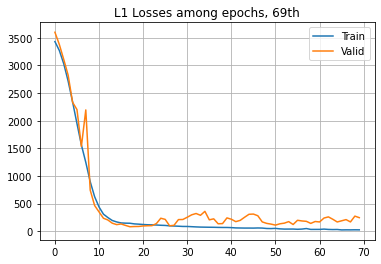

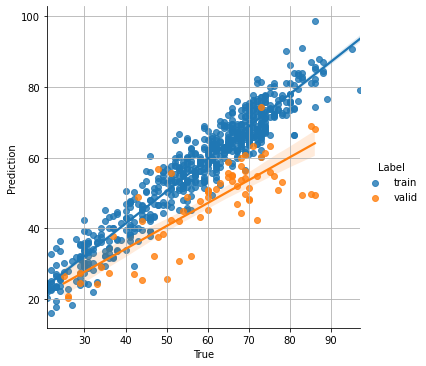

FOLD 9 - EPOCHS 70
MSE  :: [TRAIN] 24.446 | [VALID] 151.740
MAE  :: [TRAIN] 3.861   | [VALID] 9.917
RMSE :: [TRAIN] 4.684  | [VALID] 11.817
CORR :: [TRAIN] 0.956 | [VALID] 0.743
FOLD 9 - EPOCHS 75
MSE  :: [TRAIN] 22.856 | [VALID] 145.483
MAE  :: [TRAIN] 3.726   | [VALID] 9.593
RMSE :: [TRAIN] 4.469  | [VALID] 11.751
CORR :: [TRAIN] 0.959 | [VALID] 0.820


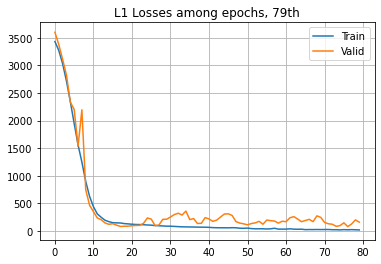

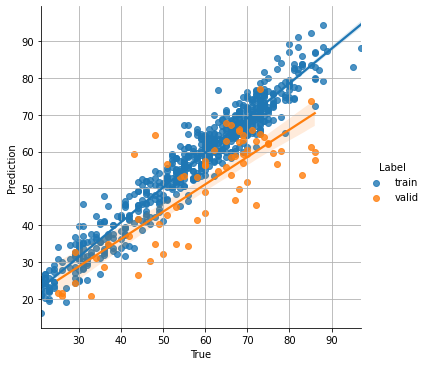

FOLD 9 - EPOCHS 80
MSE  :: [TRAIN] 19.771 | [VALID] 125.297
MAE  :: [TRAIN] 3.474   | [VALID] 8.680
RMSE :: [TRAIN] 4.230  | [VALID] 10.769
CORR :: [TRAIN] 0.965 | [VALID] 0.823
FOLD 9 - EPOCHS 85
MSE  :: [TRAIN] 9.406 | [VALID] 83.963
MAE  :: [TRAIN] 2.440   | [VALID] 7.057
RMSE :: [TRAIN] 2.931  | [VALID] 8.801
CORR :: [TRAIN] 0.983 | [VALID] 0.830


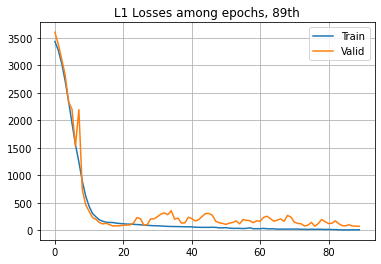

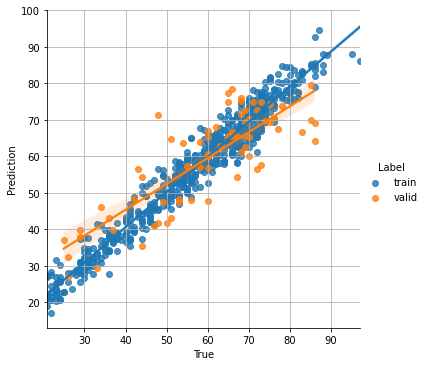

FOLD 9 - EPOCHS 90
MSE  :: [TRAIN] 11.817 | [VALID] 107.417
MAE  :: [TRAIN] 2.664   | [VALID] 8.370
RMSE :: [TRAIN] 3.255  | [VALID] 10.261
CORR :: [TRAIN] 0.979 | [VALID] 0.805
FOLD 9 - EPOCHS 95
MSE  :: [TRAIN] 13.942 | [VALID] 84.967
MAE  :: [TRAIN] 2.895   | [VALID] 7.435
RMSE :: [TRAIN] 3.542  | [VALID] 9.000
CORR :: [TRAIN] 0.975 | [VALID] 0.808


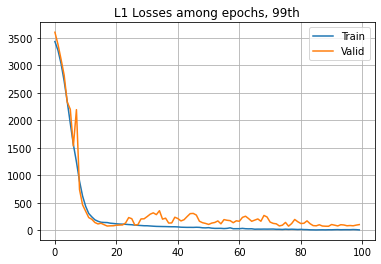

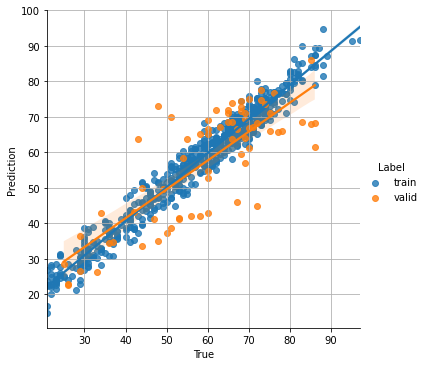

FOLD 9MSE  :: [TEST] 134.188
MAE  :: [TEST] 9.275
RMSE :: [TEST] 11.266
CORR :: [TEST] 0.762


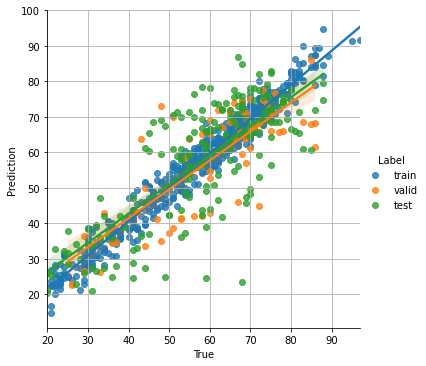

In [13]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

val_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_losses, tst_maes, tst_rmses = [], [], []
for fold in folds:
    
    model = 'dinsdale'
    model, device = load_model('dinsdale')
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    
    train_dset = MyDataset(task_type='age', fold=fold)
    valid_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    valid_loader = DataLoader(valid_dset, batch_size=8)
    
    trn_losses, val_losses = [], []
    trn_maes, val_maes = [], []
    trn_rmses, val_rmses = [], []
    
    for e in epochs:

        model, (trn_losses, trn_maes, trn_rmses), trn_preds = train(model, train_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              trn_losses, trn_maes, trn_rmses,
                                                              optimizer, scheduler, lamb)
        
        model, (val_losses, val_maes, val_rmses), val_preds =  eval(model, valid_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              val_losses, val_maes, val_rmses)


        # SUM UP RESLUTS
        trn_df = make_df(trn_preds, 'train')
        val_df = make_df(val_preds, 'valid')
        reg_df = pd.concat([trn_df, val_df], ignore_index=True)

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        val_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        if e % 5 == 0:
            print(f'FOLD {fold} - EPOCHS {e}')
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {val_losses[-1]:.3f}')
            print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {val_maes[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {val_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {val_corr:.3f}')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(val_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    val_fold['MSE'].append(val_losses)
    val_fold['MAE'].append(val_maes)
    val_fold['RMSE'].append(val_rmses)
    val_fold['Correlation'].append(val_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    model, (tst_losses, tst_maes, tst_rmses), tst_preds = eval(model, test_loader, resize, device,
                                                              loss_fn, mae_fn, rmse_fn,
                                                              tst_losses, tst_maes, tst_rmses)

    tst_df = make_df(tst_preds, 'test')
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    
    print(f'FOLD {fold}', end='')
    print(f'MSE  :: [TEST] {tst_losses[-1]:.3f}')
    print(f'MAE  :: [TEST] {tst_maes[-1]:.3f}')
    print(f'RMSE :: [TEST] {tst_rmses[-1]:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns_plot = sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    sns_plot.savefig(f'{fold}.png')
    plt.grid()
    plt.show()
    
    del model
    torch.cuda.empty_cache()

In [12]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []

trn_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

tst_fold = {
    'MSE': list(),
    'MAE': list(),
    'RMSE': list(),
    'Correlation': list()
}

for fold in folds:
    
    train_dset = MyDataset(task_type='age', fold=fold)
    test_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    trn_losses, tst_losses = [], []
    trn_maes, tst_maes = [], []
    trn_rmses, tst_rmses = [], []
    for e in epochs:

        # TRAIN
        trn_bth_loss, trn_bth_mae, trn_bth_rmse = 0, 0, 0
        trn_trues, trn_preds = [], []
        model.train()
        for i, (x, y) in enumerate(train_loader):

            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            y_pred = model.forward(x).to(device)

            trn_trues.append(y.to('cpu'))
            trn_preds.append(y_pred.to('cpu'))

            # Loss
            loss = loss_fn(y_pred.squeeze(1), y)
            
            # Metrics
            mae = mae_fn(y_pred.squeeze(1), y)
            rmse = rmse_fn(y_pred.squeeze(1), y)
            
            del x, y, y_pred

            loss.backward()
            optimizer.step()
            if scheduler: scheduler.step()

            trn_bth_loss += loss.item()
            trn_bth_mae  += loss.item()
            trn_bth_rmse += loss.item()

        torch.cuda.empty_cache()

        ### loss
        trn_losses.append(trn_bth_loss / len(train_loader))
        trn_maes.append(trn_bth_mae / len(train_loader))
        trn_rmses.append(trn_bth_rmse / len(train_loader))

        ### collect trues/predictions
        trn_trues = list(chain(*trn_trues))
        trn_preds = list(chain(*trn_preds))

        
        # VALID
        tst_bth_loss, tst_bth_mae, tst_bth_rmse = 0, 0, 0
        model.eval()
        tst_trues, tst_preds = [], []
        with torch.no_grad(): # to not give loads on GPU... :(
            for i, (x, y) in enumerate(test_loader):
                if resize:
                    x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

                else:
                    x, y = x.to(device), y.to(device)

                y_pred = model.forward(x).to(device)

                tst_trues.append(y.to('cpu'))
                tst_preds.append(y_pred.to('cpu'))

                # Loss
                loss = loss_fn(y_pred.squeeze(1), y)
                
                # Metrics
                mae = mae_fn(y_pred.squeeze(1), y)
                rmse = rmse_fn(y_pred.squeeze(1), y)
                
                del x, y, y_pred

                tst_bth_loss += loss.item()
                tst_bth_mae  += loss.item()
                tst_bth_rmse += loss.item()
                
        torch.cuda.empty_cache()
        
        ### loss
        tst_losses.append(tst_bth_loss / len(test_loader))
        tst_maes.append(tst_bth_mae / len(test_loader))
        tst_rmses.append(tst_bth_rmse / len(test_loader))

        ### collect trues/predictions
        tst_trues = list(chain(*tst_trues))
        tst_preds = list(chain(*tst_preds))

        
        # SUM UP RESLUTS
        reg_df = pd.DataFrame({
            'True': list(map(float, trn_trues + tst_trues)),
            'Prediction': list(map(float, trn_preds + tst_preds)),
            'Label': ['train'] * len(trn_trues) + ['valid'] * len(tst_trues)
        })

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        tst_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        if e % 5 == 0:
            print(f'FOLD {fold} - EPOCHS {e}')
            print(f'MSE  :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
            print(f'MAE  :: [TRAIN] {trn_maes[-1]:.3f}   | [VALID] {tst_maes[-1]:.3f}')
            print(f'RMSE :: [TRAIN] {trn_rmses[-1]:.3f}  | [VALID] {tst_rmses[-1]:.3f}')
            print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')

        if e % 10 == 9:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(tst_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold['MSE'].append(trn_losses)
    trn_fold['MAE'].append(trn_maes)
    trn_fold['RMSE'].append(trn_rmses)
    trn_fold['Correlation'].append(trn_corr)
    
    tst_fold['MSE'].append(tst_losses)
    tst_fold['MAE'].append(tst_maes)
    tst_fold['RMSE'].append(tst_rmses)
    tst_fold['Correlation'].append(tst_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    tst_bth_loss = 0
    model.eval()
    tst_trues, tst_preds = [], []
    with torch.no_grad(): # to not give loads on GPU... :(
        for i, (x, y) in enumerate(test_loader):
            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            y_pred = model.forward(x).to(device)

            tst_trues.append(y.to('cpu'))
            tst_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            
            mae = mae_fn(y_pred.squeeze(1), y)
            rmse = rmse_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            tst_bth_loss += loss.item()

    torch.cuda.empty_cache()
    ### loss
    tst_loss = tst_bth_loss / len(test_loader)

    ### collect trues/predictions
    tst_trues = list(chain(*tst_trues))
    tst_preds = list(chain(*tst_preds))
    
    tst_df = pd.DataFrame({
        'True': list(map(float, tst_trues)),
        'Prediction': list(map(float, tst_preds)),
        'Label': ['test'] * len(tst_trues)
    })
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    print(f'FOLD {fold}', end='')
    print(f'RMSE :: [TEST] {tst_loss:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()

KeyboardInterrupt: 